In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from scipy.stats import chi2_contingency
import scipy.stats as stats
from scipy import interp
import statistics 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from statistics import mean 
import statsmodels.api as sms

from sklearn import metrics
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import log_loss

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import precision_recall_curve

from imblearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from imblearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier

from functools import reduce
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN 
import itertools
import copy

import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

np.random.seed(100)

In [254]:
df = pd.read_csv('Depression Data.csv')
pd.set_option('display.max_columns', None)
df.head()

,# cigs/month,# of people in the Household,#times received healthcare/yr,BMI,C-reactive protein,C-reactive protein_NaN,Employment status,HH food security,HH food security_NaN,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other/Multi-racial,Serum folate(ng/ml),Serum folate(ng/ml)_NaN,activity level,activity level_NaN,activity min/month,age,albumin,albumin_NaN,alco_freq_year,caffeine intake,caffeine intake_NaN,cur sm status,cur sm status_NaN,diabetes status,education,ever use cocaine,ever use cocaine_NaN,family house,family income,family income_NaN,freq:12 drinks/yr?,freq:12 drinks/yr?_NaN,gender,glycohemoglobin(%),glycohemoglobin(%)_NaN,health compared to a year ago,health conditions,health insurance,health insurance_NaN,home owned,home:other,mental illness,military,never married,nicotine content,nicotine content_NaN,non-family house,now married,pain (last yr),prescr. medicine,quit sm days,rented home,serum VB12(pg/ml),serum VB12(pg/ml)_NaN,sm 100 cig?,sm yrs,sm yrs_NaN,visit to mental pro,was married,weekly work hrs,weekly work hrs_NaN,weight goal realized
0,-0.285917,0.147993,2.0,0.915518,-0.380733,0,1.0,1.0,0,0,0,1,0,0,1.836808,0,1.0,0,-0.289343,1.329418,1.210541,0,-0.346948,-0.459224,0,1.0,1,0.0,3.0,1.0,0,1,11.0,0,1.0,0,1.0,0.324840,0,3.0,4.0,1.0,0,1,0,0,1.0,0,-0.200270,1,0,1,0.0,1.0,0.017071,0,1.447257,0,0.0,-0.282324,1,0.0,0,1.251773,0,0
1,-1.062538,-1.050119,2.0,-0.293148,1.082655,0,0.0,1.0,0,1,0,0,0,0,1.287083,0,1.0,0,-1.205641,-1.080591,-0.212530,0,2.045648,-0.459224,0,3.0,0,0.0,1.0,1.0,0,0,6.0,0,1.0,0,0.0,-1.383768,0,3.0,1.0,0.0,0,0,0,0,0.0,0,-0.016168,1,1,1,1.0,0.0,-0.852037,1,-1.157737,0,1.0,0.840626,1,0.0,0,-0.050664,1,1
2,-0.081956,1.945161,1.0,-0.336460,-0.502682,0,0.0,3.0,0,0,1,0,0,0,-0.752219,0,1.0,0,1.210053,1.501562,-0.102618,0,0.160572,1.105870,0,1.0,0,0.0,2.0,1.0,0,0,5.0,0,1.0,0,0.0,-1.042046,0,2.0,4.0,0.0,0,0,0,1,0.0,0,2.285113,0,1,1,1.0,0.0,-0.895805,1,0.075920,0,1.0,-1.405273,0,0.0,0,0.837820,1,0
3,-0.897800,-1.050119,0.0,0.573942,-0.289271,0,1.0,1.0,0,1,0,0,0,0,-0.096096,0,2.0,0,-0.455943,1.329418,-0.634824,0,-0.781966,-0.459224,0,3.0,1,0.0,3.0,0.0,0,1,6.0,0,0.0,0,1.0,-1.042046,0,1.0,1.0,1.0,0,1,0,0,0.0,1,-0.292322,1,0,0,0.0,0.0,1.556768,0,0.161388,0,0.0,0.198940,1,0.0,0,1.453702,0,1
4,-0.670305,-1.050119,0.0,2.087366,-0.045373,0,1.0,2.0,0,0,1,0,0,0,-1.177812,0,1.0,0,-0.897432,-0.392017,-0.565406,0,1.103110,-0.459224,0,3.0,1,0.0,3.0,0.0,0,0,5.0,0,1.0,0,1.0,1.350005,0,1.0,2.0,0.0,0,0,0,0,0.0,1,0.167935,1,1,0,0.0,0.0,0.929947,1,1.064822,0,0.0,0.239046,1,0.0,0,-2.080044,0,0


In [255]:
df = df.rename(columns={"mental illness": "Depression"})

In [256]:
y = df['Depression']
X = df.drop(['Depression'],axis = 1)
X_names = df.drop(['Depression'],axis = 1).columns.tolist()
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state = 2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1, random_state = 2)


In [257]:
print('X_train.shape')
print(X_train.shape)
print('X_val.shape')
print(X_val.shape)
print('X_test.shape')
print(X_test.shape)

X_train.shape
(1232, 65)
X_val.shape
(137, 65)
X_test.shape
(153, 65)


In [258]:
numerical_variables = ['age','weekly work hrs','sm yrs','nicotine content','BMI',
                       'alco_freq_year','quit sm days','# cigs/month','activity min/month',
                       'Serum folate(ng/ml)','serum VB12(pg/ml)',
                       'glycohemoglobin(%)','C-reactive protein','albumin','caffeine intake','# of people in the Household']

ordinal_variables = ['family income','education','HH food security','health conditions',
                     'health compared to a year ago','#times received healthcare/yr',
                     'activity level','cur sm status']

true_false_variables = ['now married','was married','never married','non-family house',
                        'family house','Mexican American','Other Hispanic',
                        'Non-Hispanic White','Non-Hispanic Black','Other/Multi-racial',
                        'home owned','rented home','home:other','gender','military','visit to mental pro','sm 100 cig?',
                        'freq:12 drinks/yr?','ever use cocaine','weight goal realized','Employment status',
                        'diabetes status','pain (last yr)','prescr. medicine','health insurance']

nan_variables = ['family income_NaN', 'HH food security_NaN', 'weekly work hrs_NaN', 
                 'cur sm status_NaN', 'sm yrs_NaN', 'nicotine content_NaN', 
                 'freq:12 drinks/yr?_NaN', 'ever use cocaine_NaN', 'activity level_NaN', 
                 'Serum folate(ng/ml)_NaN', 'serum VB12(pg/ml)_NaN', 'glycohemoglobin(%)_NaN', 
                 'C-reactive protein_NaN', 'albumin_NaN', 'caffeine intake_NaN', 'health insurance_NaN']

categorical_variables = ordinal_variables + true_false_variables + nan_variables



In [259]:
def plot_confusion_matrix(y_val, y_val_predictions):
    cm = metrics.confusion_matrix(y_val, y_val_predictions)

    class_names=[0,1] 
    plt.figure(figsize=(5,3))
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [260]:
# Create a series with feature importances:
def feature_importance(clf,names):
    featimp = pd.Series(clf.feature_importances_,index=names).sort_values(ascending=False)
    print('feature importance')
    print(featimp)
    plt.figure(figsize=(15,10))
    sns.set(font_scale=0.9)
    sns.barplot(x=featimp, y=featimp.index,dodge=False)
    plt.xlabel('Feature Importance Score',fontsize = 13)
    plt.ylabel('Features',fontsize = 13)
    plt.title("Feature Importance",fontsize = 13)
    plt.show()
    return featimp


In [261]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(7,7))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision",linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

In [262]:
##### RUN THIS CELL WILL CLEAR OUT model_results!!!!!!!! #####
model_results = pd.DataFrame(columns=['Name', 'Accuracy','train Accuracy', 'Recall', 'train Recall',
                                      'Precision', 'train Precision','F1','train F1','Roc Auc','train Roc Auc'])


In [263]:
best_clf_probabilities = {}

def add_results(clf_name,accuracy,train_accuracy,recall,train_recall,precision,train_precision,
                f1,train_f1,roc_auc,train_roc_auc):
    
    global model_results        
    new_row = pd.DataFrame([[clf_name,accuracy,train_accuracy,recall,train_recall,precision,train_precision,
                             f1,train_f1,roc_auc,train_roc_auc]], 
                             columns=model_results.columns)
    model_results = model_results.append(new_row, ignore_index=True)
    model_results = model_results.sort_values(by=['Name'])

    
def fit_and_predict(clf, clf_name, X_train, y_train, X_val, y_val, decision_boundary=0.5):    
    
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    # default decision boundary = 0.5
    y_val_pred = clf.predict(X_val)
    # customized decision boundary 
#     decision_boundary = 0.5
    y_val_pred = (clf.predict_proba(X_val)[:,1] >= decision_boundary).astype(bool) 
    
    roc_auc = roc_auc_score(y_val, y_val_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    add_results(clf_name,accuracy,train_accuracy,recall,train_recall,precision,train_precision,
                f1,train_f1,roc_auc,train_roc_auc)
    
    if 'Best' in clf_name:
#         plot_roc(y_val,y_val_pred,clf,X_val)
        plot_confusion_matrix(y_val, y_val_pred)
        probability = clf.predict_proba(X_val)[:, 1]
        best_clf_probabilities[clf_name] = probability
        precision, recall, thresholds = precision_recall_curve(y_val, probability)
        plot_precision_recall_vs_threshold(precision, recall, thresholds)
    
    return clf



In [264]:
def cv(unfitted_clf, clf_name, X,y):
    
    accuracy_scores = cross_val_score(unfitted_clf, X_train_val, y_train_val, cv=5, scoring = 'accuracy')
    precision_scores = cross_val_score(unfitted_clf, X_train_val, y_train_val, cv=5, scoring = 'precision')
    recall_scores = cross_val_score(unfitted_clf, X_train_val, y_train_val, cv=5, scoring = 'recall')
    roc_auc_scores = cross_val_score(unfitted_clf, X_train_val, y_train_val, cv=5, scoring = 'roc_auc')
    f1_scores = cross_val_score(unfitted_clf, X_train_val, y_train_val, cv=5, scoring = 'f1')

    #     y_train_val_pred = cross_val_predict(clf, X_train_val, y_train_val)[:,1]


    print('accuracy')
    print(mean(accuracy_scores))
    print(accuracy_scores)
    print('recall')
    print(mean(recall_scores))
    print(recall_scores)
    print('precision')
    print(mean(precision_scores))
    print(precision_scores)
    print('f1')
    print(mean(f1_scores))
    print(f1_scores)
    print('roc auc')
    print(mean(roc_auc_scores))
    print(roc_auc_scores)
    
    add_results(clf_name,mean(accuracy_scores),'N/A',mean(recall_scores),'N/A',mean(precision_scores),'N/A',
                mean(f1_scores),'N/A',mean(roc_auc_scores),'N/A')
    
#     print("ROC-AUC score: {}".format(roc_auc_score(y_train_val, y_train_val_pred)))
    

In [265]:
def hyperparameters(clf, method, grid):
    
    if method == 'random':
        clf_search = RandomizedSearchCV(clf, param_distributions = grid,scoring = 'roc_auc', verbose=2, random_state=42, n_jobs = -1)
    elif method == 'gridsearch':
        clf_search = GridSearchCV(clf, param_grid = grid, n_jobs = -1,scoring = 'roc_auc', refit = True)
    else: 
        print('not included')
    
    return clf_search


### steps:
1. A search through all candidate models, and pick the best ones to tune
2. For the good baseline models selected from step 1, do feature selection
3. Based on the result of step 2, do hyperparameter tuning

In [266]:
# step 1:
# Compare baseline models

clf_list = [
    ('Random Forest', RandomForestClassifier(random_state=0)),
    ('SVC', SVC(random_state=0,probability=True)),
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('KNN', KNeighborsClassifier()),
    ('XGBoost', XGBClassifier(random_state=0)),
]

sm = SMOTE(random_state=42)

for clf_name, clf in clf_list:
    print(clf_name)
    baseline_pipeline = Pipeline([('sm', sm),
                                  ('clf', clf)])
    fit_and_predict(baseline_pipeline, clf_name, X_train.values, y_train.values, X_val.values, y_val.values)

Random Forest
SVC
Logistic Regression
KNN
XGBoost


### baseline results

In [267]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
3,SVC,0.868613,0.938312,0.272727,0.918919,0.230769,0.603550,0.250000,0.728571,0.596681,0.929575
1,Logistic Regression,0.700730,0.747565,0.454545,0.684685,0.125000,0.215909,0.196078,0.328294,0.588384,0.719238
0,KNN,0.576642,0.719156,0.454545,1.000000,0.087719,0.242888,0.147059,0.390845,0.520924,0.845674
2,Random Forest,0.875912,0.991883,0.090909,0.918919,0.125000,0.990291,0.105263,0.953271,0.517677,0.959013
4,XGBoost,0.905109,0.938312,0.000000,0.342342,0.000000,0.926829,0.000000,0.500000,0.492063,0.669833


In [268]:
# clear baseline results
def clear_model_results():
    global model_results
    model_results = pd.DataFrame(columns=['Name', 'Accuracy','train Accuracy', 'Recall', 'train Recall',
                                          'Precision', 'train Precision','F1','train F1','Roc Auc','train Roc Auc'])

clear_model_results()

### FEATURE SELECTION (reduce collinearity)

### VIF: check collinearity

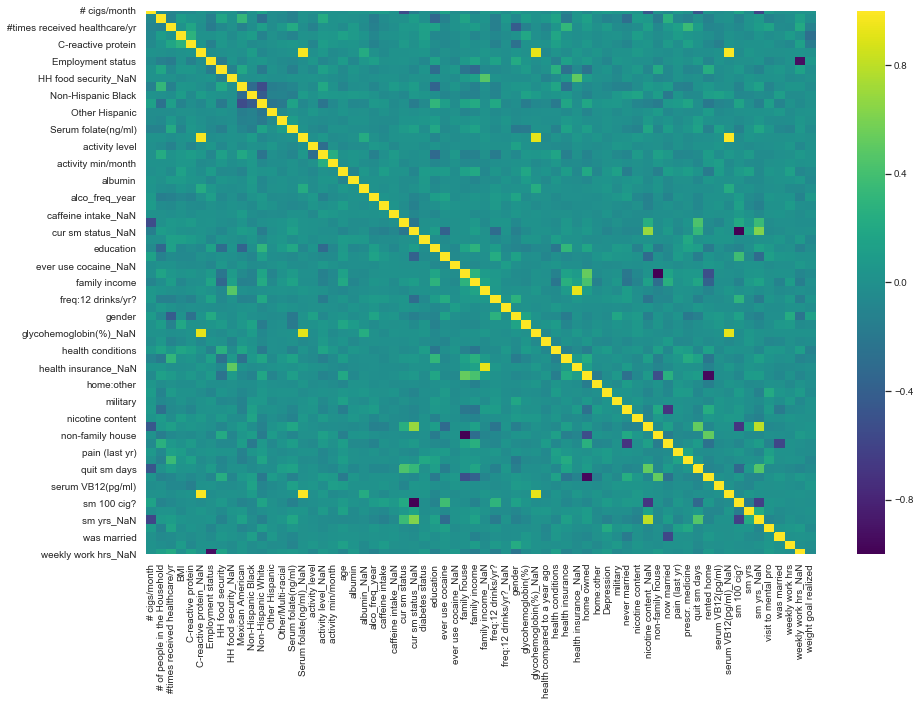

In [269]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=False, cmap='viridis')

In [270]:
# check for feature collinearity 
# When measuring, if the two features have a VIF of 1, then they are not collinear of each other 
# As the numbers increases, the higher they are correlated with each other. 
# If VIF returns a number greater than 5, then those two features should be reduced to one using PCA.

from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    dropped_variables = []
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            dropped_variables.append(X.iloc[:, variables].columns[maxloc])
            del variables[maxloc]
            dropped = True

    Remaining_variables = X.columns[variables].tolist()
    return Remaining_variables,dropped_variables

vif_features,dropped_variables = calculate_vif(X_train)
print('these are colinear and are dropped')
print(dropped_variables)
print()
print('these are good')
print(vif_features)


dropping 'Mexican American' at index: 9
dropping 'cur sm status_NaN' at index: 25
dropping 'family house' at index: 29
dropping 'home owned' at index: 40
dropping 'serum VB12(pg/ml)_NaN' at index: 52
dropping 'now married' at index: 46
dropping 'C-reactive protein_NaN' at index: 5
dropping 'Employment status' at index: 5
dropping 'sm yrs_NaN' at index: 51
dropping 'education' at index: 24
dropping 'nicotine content_NaN' at index: 41
dropping 'health insurance_NaN' at index: 36
dropping 'health compared to a year ago' at index: 33
dropping 'activity level' at index: 13
dropping 'cur sm status' at index: 21
dropping 'health conditions' at index: 31
dropping 'glycohemoglobin(%)_NaN' at index: 30
dropping 'family income' at index: 24
these are colinear and are dropped
['Mexican American', 'cur sm status_NaN', 'family house', 'home owned', 'serum VB12(pg/ml)_NaN', 'now married', 'C-reactive protein_NaN', 'Employment status', 'sm yrs_NaN', 'education', 'nicotine content_NaN', 'health insuran

vif picked dummy variables to be highly correlated, which can be ignored. see here: https://statisticalhorizons.com/multicollinearity here all redundant features vif picked out are categorical features

In [271]:
dropped_categorical_variables = [i for i in categorical_variables if i in dropped_variables]
len(dropped_categorical_variables) 

18

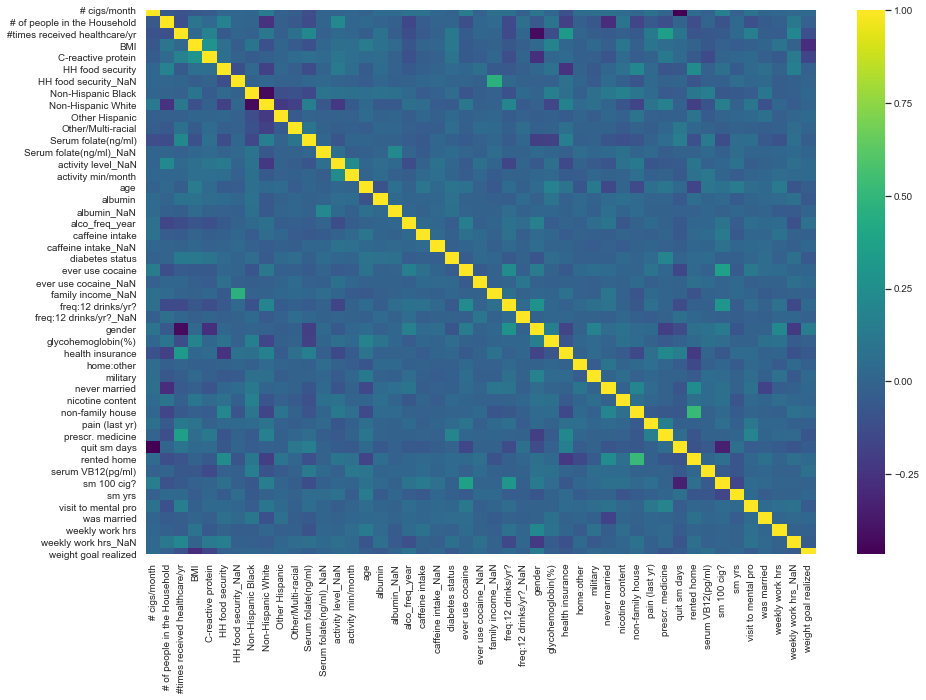

In [272]:
plt.figure(figsize=(15,10))
sns.heatmap(data= df[vif_features].corr(), annot=False, cmap='viridis')

After reducing the highly correlated variables, the heatmap has fewer yellow squares -> no redundant variables

### check feature redundancy (numerical)

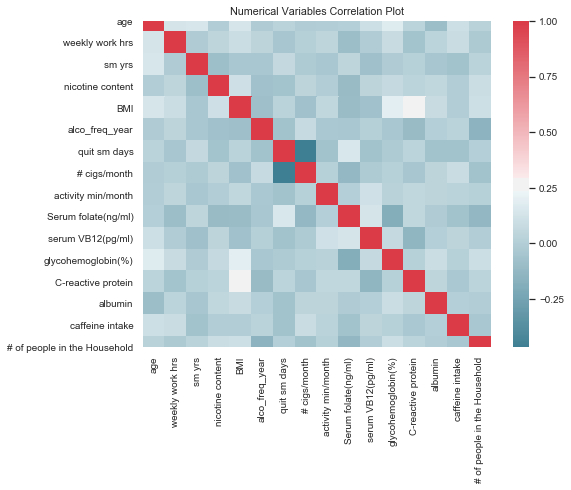

In [273]:
corr_df = df[numerical_variables]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")

sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [274]:
numerical_variables_1 = [v for v in numerical_variables if v!= 'quit sm days']

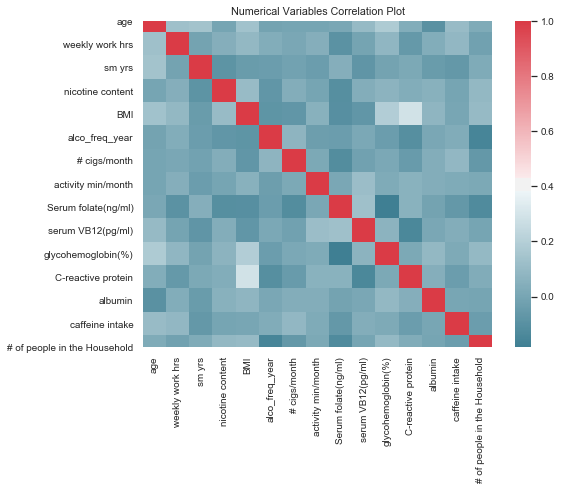

In [275]:
corr_df = df[numerical_variables_1]
cor = corr_df.corr(method='pearson')
fig, ax = plt.subplots(figsize=(8, 6))
plt.title("Numerical Variables Correlation Plot")

sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

In [276]:
vif_features = [v for v in vif_features if v!= 'quit sm days']
original_features = numerical_variables + categorical_variables
print('Reduce feature size by removing collinear feature using Vif and Pearson')
print(len(original_features)-len(vif_features))

Reduce feature size by removing collinear feature using Vif and Pearson
19


In [277]:
pd.set_option('display.max_rows', None)

#### Attempt 1: random forest

In [278]:
sm = SMOTE(random_state=42)
rf = RandomForestClassifier(random_state=0,n_jobs=-1)

pipeline1 = Pipeline([('sm', sm), 
                      ('rf', rf)])

rf1 = fit_and_predict(pipeline1, 'rf: Baseline original features', X_train, y_train, X_val, y_val)

feature importance
visit to mental pro              0.090937
pain (last yr)                   0.049863
Employment status                0.044640
health compared to a year ago    0.044256
Non-Hispanic White               0.042161
weekly work hrs_NaN              0.039773
# of people in the Household     0.032069
weight goal realized             0.025125
caffeine intake                  0.024061
rented home                      0.022744
BMI                              0.022536
#times received healthcare/yr    0.022016
health conditions                0.021620
Mexican American                 0.020454
serum VB12(pg/ml)                0.020098
weekly work hrs                  0.019767
sm yrs                           0.019679
albumin                          0.019340
cur sm status_NaN                0.018548
Serum folate(ng/ml)              0.018432
family house                     0.017955
nicotine content                 0.017808
home owned                       0.017775
prescr. medicin

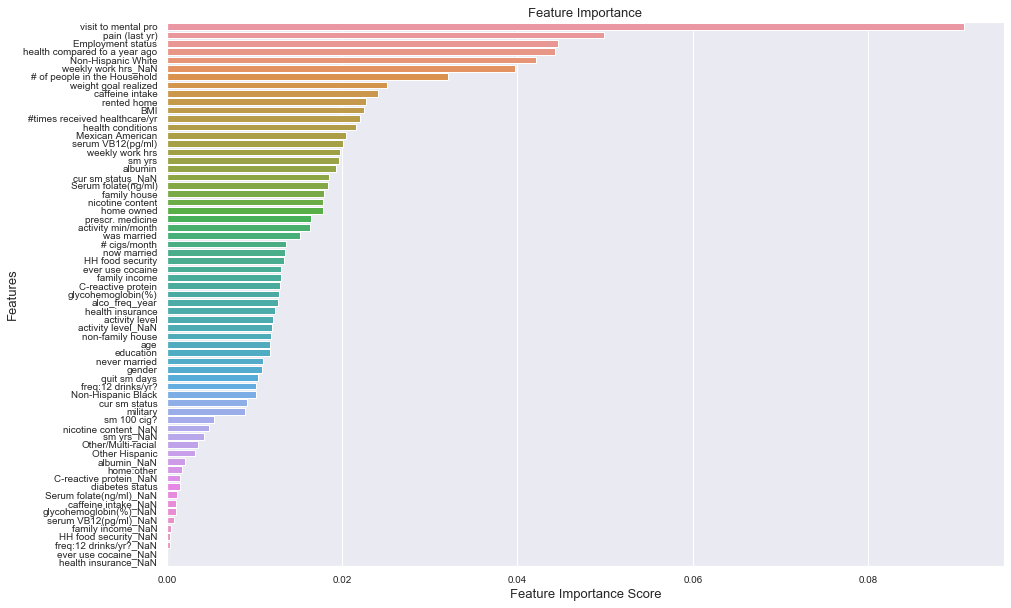

In [279]:
featimp = feature_importance(rf1[1],X_names)

In [280]:
rf12 = fit_and_predict(pipeline1, 'rf: Baseline vif features', X_train[vif_features], y_train, X_val[vif_features], y_val)

feature importance
visit to mental pro              0.067847
weekly work hrs_NaN              0.066045
# of people in the Household     0.065206
Non-Hispanic White               0.047001
weight goal realized             0.042579
prescr. medicine                 0.038874
pain (last yr)                   0.036021
# cigs/month                     0.035450
ever use cocaine                 0.032381
sm 100 cig?                      0.031667
gender                           0.029875
activity level_NaN               0.029075
caffeine intake                  0.028831
#times received healthcare/yr    0.028756
age                              0.025808
Serum folate(ng/ml)              0.025598
C-reactive protein               0.024031
activity min/month               0.023683
alco_freq_year                   0.023268
weekly work hrs                  0.021577
nicotine content                 0.021530
glycohemoglobin(%)               0.021499
non-family house                 0.020544
was married    

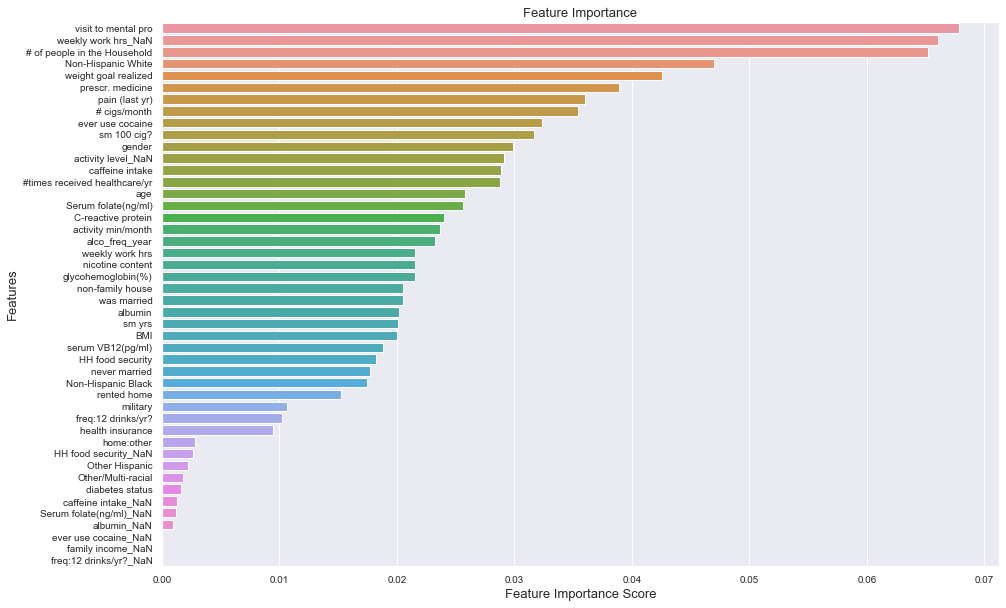

In [281]:
featimp = feature_importance(rf12[1],vif_features)

In [282]:
# highest roc_auc at threshold = 0.04
thresholds = [0.0001,0.001,0.01,0.003,0.01,0.011,0.013,0.014,0.016,0.017,0.02,0.03,0.04] # threshold at 0.03 is the best, keep this and narrow down
# threshold = 0.04
for threshold in thresholds:
    sfm = SelectFromModel(RandomForestClassifier(random_state=0), threshold=threshold)
    pipeline2 = Pipeline([('sm', sm), 
                          ('sfm', sfm),
                          ('rf', rf)])

    rf2 = fit_and_predict(pipeline2, 'rf: featimp(original feature) threshold at '+str(threshold), X_train, y_train, X_val, y_val)


In [283]:
thresholds = [0,0.001,0.002,0.003,0.01,0.02,0.025,0.04,0.045] 
# threshold = 0.04
for threshold in thresholds:
    sfm = SelectFromModel(RandomForestClassifier(random_state=0), threshold=threshold)
    pipeline2 = Pipeline([('sm', sm), 
                          ('sfm', sfm),
                          ('rf', rf)])

    rf2 = fit_and_predict(pipeline2, 'rf: Featimp(vif_feature) threshold at '+str(threshold), X_train[vif_features], y_train, X_val[vif_features], y_val)


can see that from Baseline to threshold = 0.018 are all severely overfitted, as the number of feature(threshold increases, overfitting is less significant). at threshold = 0.04, the discrepancy between train and val is the smallest with a relatively high roc auc. threshold = 0.04 appears to be the best(smallest difference btw train and val) for both (original features) and (vif features). original feature w/ 0.04 is better bc vif still shows overfitting

In [284]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
8,rf: Featimp(vif_feature) threshold at 0.025,0.897810,0.989448,0.181818,0.882883,0.285714,1.000000,0.222222,0.937799,0.571068,0.941441
4,rf: Featimp(vif_feature) threshold at 0.002,0.897810,0.992695,0.181818,0.927928,0.285714,0.990385,0.222222,0.958140,0.571068,0.963518
18,rf: featimp(original feature) threshold at 0.016,0.890511,0.993506,0.181818,0.927928,0.250000,1.000000,0.210526,0.962617,0.567100,0.963964
20,rf: featimp(original feature) threshold at 0.02,0.890511,0.990260,0.181818,0.891892,0.250000,1.000000,0.210526,0.942857,0.567100,0.945946
5,rf: Featimp(vif_feature) threshold at 0.003,0.883212,0.990260,0.181818,0.900901,0.222222,0.990099,0.200000,0.943396,0.563131,0.950004
21,rf: featimp(original feature) threshold at 0.03,0.883212,0.927760,0.181818,0.405405,0.222222,0.661765,0.200000,0.502793,0.563131,0.692444
2,rf: Featimp(vif_feature) threshold at 0,0.868613,0.992695,0.181818,0.927928,0.181818,0.990385,0.181818,0.958140,0.555195,0.963518
1,rf: Baseline vif features,0.868613,0.992695,0.181818,0.927928,0.181818,0.990385,0.181818,0.958140,0.555195,0.963518
23,rf: Featimp(vif_feature) threshold at 0.045,0.919708,0.913149,0.090909,0.180180,0.500000,0.555556,0.153846,0.272109,0.541486,0.582954
3,rf: Featimp(vif_feature) threshold at 0.001,0.905109,0.994318,0.090909,0.936937,0.250000,1.000000,0.133333,0.967442,0.533550,0.968468


In [285]:
clear_model_results()

In [286]:
sfm = SelectFromModel(RandomForestClassifier(random_state=0), threshold=0.04)
pipeline2 = Pipeline([('sm', sm), 
                      ('sfm', sfm),
                      ('rf', rf)])

rf3 = fit_and_predict(pipeline2, 'rf: Featimp(original features) at threshold 0.04', X_train, y_train, X_val, y_val)

In [287]:
chosen_feature_indices = rf3[1].get_support(indices=True)
rf_original_features = [X_names[i] for i in chosen_feature_indices]
rf_original_features

['Employment status',
 'Non-Hispanic White',
 'health compared to a year ago',
 'pain (last yr)',
 'visit to mental pro']

In [288]:
# grid 1
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 105, num = 10)]
max_features = ['sqrt','log2',None]
max_depth = [int(x) for x in np.linspace(10, 50, num = 10)]
min_samples_splits = [10,20,30,40,50]
min_samples_splits = np.linspace(0, 1, 10, endpoint=True)

min_samples_leaf = [10,20,30,40,50] 
bootstrap = [True]

rf_grid1 =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_splits,
            'rf__n_estimators': n_estimators}

In [289]:
rf4 = hyperparameters(pipeline1,'random',rf_grid1) 
rf4 = fit_and_predict(rf4, 'rf: Feature importance + random search 1', X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.8s finished


In [290]:
rf4.best_params_

{'rf__n_estimators': 93,
 'rf__min_samples_split': 0.1111111111111111,
 'rf__min_samples_leaf': 50,
 'rf__max_features': None,
 'rf__max_depth': 45,
 'rf__bootstrap': True}

In [291]:
# random search on another grid2: with a wider range
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 200, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
# min_samples_splits = [10,20,30,40,50]
min_samples_splits = np.linspace(0, 1, 10, endpoint=True)
min_samples_leaf = [10,20,30,40,50] 
bootstrap = [True]

rf_grid2 =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_splits,
            'rf__n_estimators': n_estimators}

In [292]:
rf5 = hyperparameters(pipeline1,'random',rf_grid2) 
rf5 = fit_and_predict(rf5, 'rf: Feature importance + random search 2', X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    8.0s finished


In [293]:
rf5.best_params_

{'rf__n_estimators': 70,
 'rf__min_samples_split': 0.2222222222222222,
 'rf__min_samples_leaf': 10,
 'rf__max_features': 'log2',
 'rf__max_depth': None,
 'rf__bootstrap': True}

In [294]:
np.linspace(0, 1, 11, endpoint=True)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [295]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 300, num = 20)]
max_features = ['auto', 'sqrt','log2']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]
min_samples_splits = [0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1,2,3,4,5,6,7,8,9,10,20,30,40,50]
min_samples_leaf = [2,4,6,8,10,20,30,40,50,60,70] 

rf_grid3 =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_splits,
            'rf__n_estimators': n_estimators}

In [296]:
rf6 = hyperparameters(pipeline1,'random',rf_grid3) 
rf6 = fit_and_predict(rf6, 'rf: Feature importance + random search 3', X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)
rf6.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   10.5s finished


{'rf__n_estimators': 113,
 'rf__min_samples_split': 0.5,
 'rf__min_samples_leaf': 8,
 'rf__max_features': 'log2',
 'rf__max_depth': 80,
 'rf__bootstrap': True}

In [297]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
3,rf: Feature importance + random search 3,0.817518,0.824675,0.363636,0.432432,0.181818,0.238806,0.242424,0.307692,0.610390,0.647974
1,rf: Feature importance + random search 1,0.773723,0.794643,0.363636,0.549550,0.142857,0.231061,0.205128,0.325333,0.586580,0.684231
2,rf: Feature importance + random search 2,0.766423,0.785714,0.363636,0.558559,0.137931,0.223827,0.200000,0.319588,0.582612,0.683383
0,rf: Featimp(original features) at threshold 0.04,0.905109,0.915584,0.090909,0.189189,0.250000,0.600000,0.133333,0.287671,0.533550,0.588350


In [298]:
def generate_parameter_score(clf,X_train):
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)
    return scores.mean()
    
def plot_parameter_scores(parameters,parameter_name,cross_val_results):
    plt.figure(figsize=(10,5))
    line = plt.plot(parameters,cross_val_results,'bo-')
    plt.ylabel('Roc Auc',fontsize=13)
    plt.xlabel(parameter_name,fontsize=13)
    plt.legend(['cross_val_score'],fontsize=13)
    plt.show()    

* See how roc auc scores changes as one parameter changes in a range

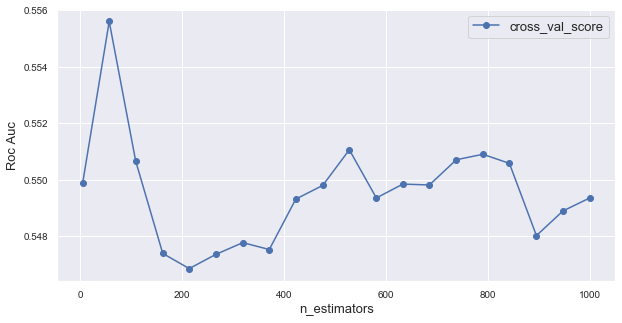

In [299]:
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 1000, num = 20)]
# n_estimators = [int(x) for x in np.linspace(start = 500, stop = 750, num = 20)]

scores = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(n_estimators,'n_estimators',scores)

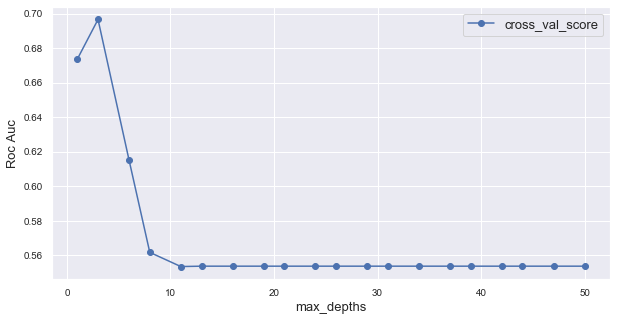

In [300]:
max_depths = [int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
# max_depths = [int(x) for x in np.linspace(10, 50, num = 10)]

scores = []
for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(max_depths,'max_depths',scores)

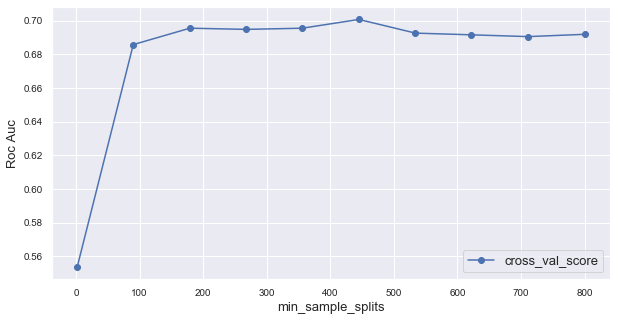

In [301]:
min_samples_splits = [int(x) for x in np.linspace(start = 2, stop = 800, num = 10)]
scores = []
for split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=split, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(min_samples_splits,'min_sample_splits',scores)

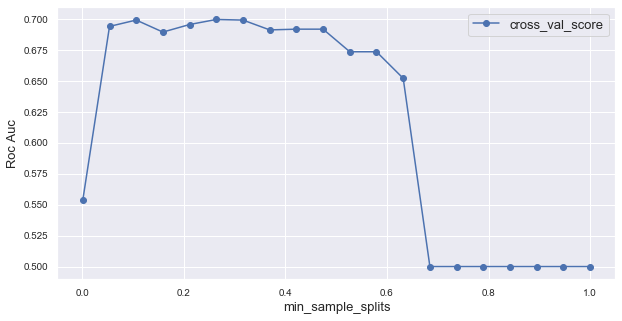

In [302]:
min_samples_splits = np.linspace(0.001, 1, 20, endpoint=True)
scores = []
for split in min_samples_splits:
    rf = RandomForestClassifier(min_samples_split=split, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(min_samples_splits,'min_sample_splits',scores)

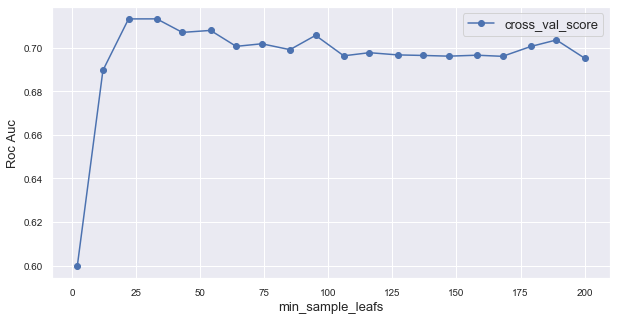

In [303]:
# min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_leafs = [int(x) for x in np.linspace(start = 2, stop = 200, num = 20)] 
scores = []
for leaf in min_samples_leafs:
    rf = RandomForestClassifier(min_samples_leaf=leaf, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(min_samples_leafs,'min_sample_leafs',scores)

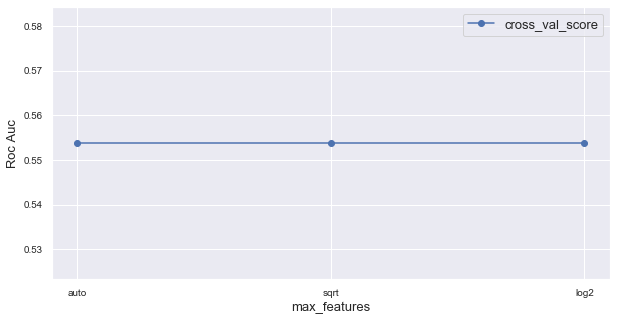

In [304]:
max_features = ['auto', 'sqrt','log2']
scores = []
for max_feature in max_features:
    rf = RandomForestClassifier(max_features=max_feature, n_jobs=-1,random_state=0)
    pipeline0 = Pipeline([('sm',sm),('rf',rf)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(max_features,'max_features',scores)

In [305]:
# random search on another grid2: with a wider range
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 200, num = 10)]
max_depth = [1,2,3,4,5]
min_samples_splits = [0.2,0.3,0.4,0.5,0.6]
max_features = ['auto', 'sqrt','log2']
min_samples_leaf = [int(x) for x in np.linspace(start = 100, stop = 150, num = 10)]

rf_grid_narrow =  {'rf__bootstrap': bootstrap,
            'rf__max_depth': max_depth,
            'rf__max_features': max_features,
            'rf__min_samples_leaf': min_samples_leaf,
            'rf__min_samples_split': min_samples_splits,
            'rf__n_estimators': n_estimators}

In [306]:
rf7 = hyperparameters(pipeline1,'random',rf_grid_narrow) 
rf7 = fit_and_predict(rf7, 'rf: Feature importance + random search narrow', X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.9s finished


In [307]:
rf7.best_params_

{'rf__n_estimators': 144,
 'rf__min_samples_split': 0.5,
 'rf__min_samples_leaf': 122,
 'rf__max_features': 'log2',
 'rf__max_depth': 4,
 'rf__bootstrap': True}

In [308]:
# random search 2 and narrow search give same result
best_rf = rf5.best_estimator_

<Figure size 360x216 with 0 Axes>

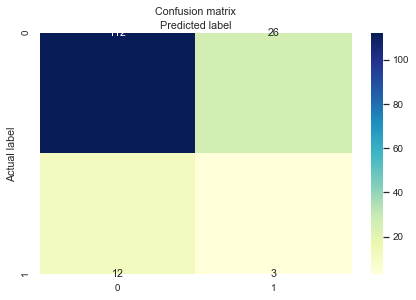

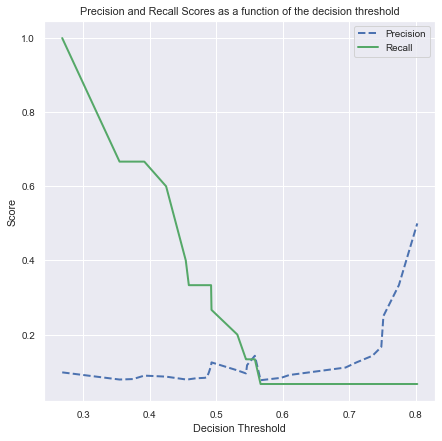

In [309]:
best_rf_test = fit_and_predict(best_rf, 'rf: Best on test', X_train[rf_original_features], y_train, X_test[rf_original_features], y_test)


In [310]:
baseline_rf_test = fit_and_predict(pipeline1, 'rf: Baseline on test', X_train, y_train, X_test, y_test)

In [311]:
# use same hyperparameter range as in random search 2
# rf_cv = hyperparameters(pipeline1,'random',rf_grid2)

rf_cv = cv(best_rf, 'rf_cv: Feature importance + random search 2', X[rf_original_features], y)


accuracy
0.859055611055611
[0.81454545 0.88       0.87179487 0.84615385 0.88278388]
recall
0.335
[0.32       0.48       0.25       0.29166667 0.33333333]
precision
0.27568581780538304
[0.19047619 0.375      0.26086957 0.21875    0.33333333]
f1
0.2997022167995409
[0.23880597 0.42105263 0.25531915 0.25       0.33333333]
roc auc
0.6999391164658635
[0.6136     0.7872     0.71703481 0.67670683 0.70515395]


In [312]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
7,rf_cv: Feature importance + random search 2,0.859056,N/A,0.335000,N/A,0.275686,N/A,0.299702,N/A,0.699939,N/A
5,rf: Feature importance + random search 3,0.817518,0.824675,0.363636,0.432432,0.181818,0.238806,0.242424,0.307692,0.610390,0.647974
6,rf: Feature importance + random search narrow,0.781022,0.796266,0.363636,0.459459,0.148148,0.210744,0.210526,0.288952,0.590548,0.644538
3,rf: Feature importance + random search 1,0.773723,0.794643,0.363636,0.54955,0.142857,0.231061,0.205128,0.325333,0.586580,0.684231
4,rf: Feature importance + random search 2,0.766423,0.785714,0.363636,0.558559,0.137931,0.223827,0.200000,0.319588,0.582612,0.683383
2,rf: Featimp(original features) at threshold 0.04,0.905109,0.915584,0.090909,0.189189,0.250000,0.6,0.133333,0.287671,0.533550,0.58835
0,rf: Baseline on test,0.875817,0.991883,0.066667,0.918919,0.166667,0.990291,0.095238,0.953271,0.515217,0.959013
1,rf: Best on test,0.751634,0.785714,0.200000,0.558559,0.103448,0.223827,0.136364,0.319588,0.505797,0.683383


In [313]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(best_clf,X):
    train_sizes = [int(x) for x in np.linspace(start = 10, stop = 811, num = 30)]
    train_sizes, train_scores, validation_scores = learning_curve(estimator = best_clf, 
                                                                  X = X, 
                                                                  y = y_train_val, 
                                                                  train_sizes = train_sizes, 
                                                                  cv = 3, 
                                                                  scoring = 'roc_auc')
    train_scores_mean = train_scores.mean(axis = 1)
    validation_scores_mean = validation_scores.mean(axis = 1)
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean, label = 'Training roc auc',marker='o')
    plt.plot(train_sizes, validation_scores_mean, label = 'Validation roc auc',marker='o')
    plt.ylabel('Roc Auc', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning Curves', fontsize = 14, y = 1.03)
    plt.legend()
    plt.ylim(0.4,1)

In [314]:
plot_learning_curve(best_rf,X_train_val[rf_original_features])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

#### Attempt 2: XGBoost


In [315]:
clear_model_results()

In [316]:
xgb = XGBClassifier(random_state=0,n_jobs=-1)
pipeline1 = Pipeline([('sm', sm),('xgb1', xgb)])
xgb1 = fit_and_predict(pipeline1,'xgb: Baseline(original)', X_train.values, y_train.values, X_val.values, y_val.values)

feature importance
Mexican American                 0.091013
visit to mental pro              0.073595
weekly work hrs_NaN              0.069577
home owned                       0.051784
activity level                   0.049042
pain (last yr)                   0.048200
weight goal realized             0.044921
health compared to a year ago    0.035553
sm yrs_NaN                       0.034107
activity level_NaN               0.033250
freq:12 drinks/yr?               0.031709
Non-Hispanic Black               0.030790
now married                      0.029459
health conditions                0.028529
Non-Hispanic White               0.021614
ever use cocaine                 0.021352
was married                      0.020987
gender                           0.018875
never married                    0.018237
Employment status                0.015688
rented home                      0.015372
family house                     0.015178
cur sm status_NaN                0.013159
military       

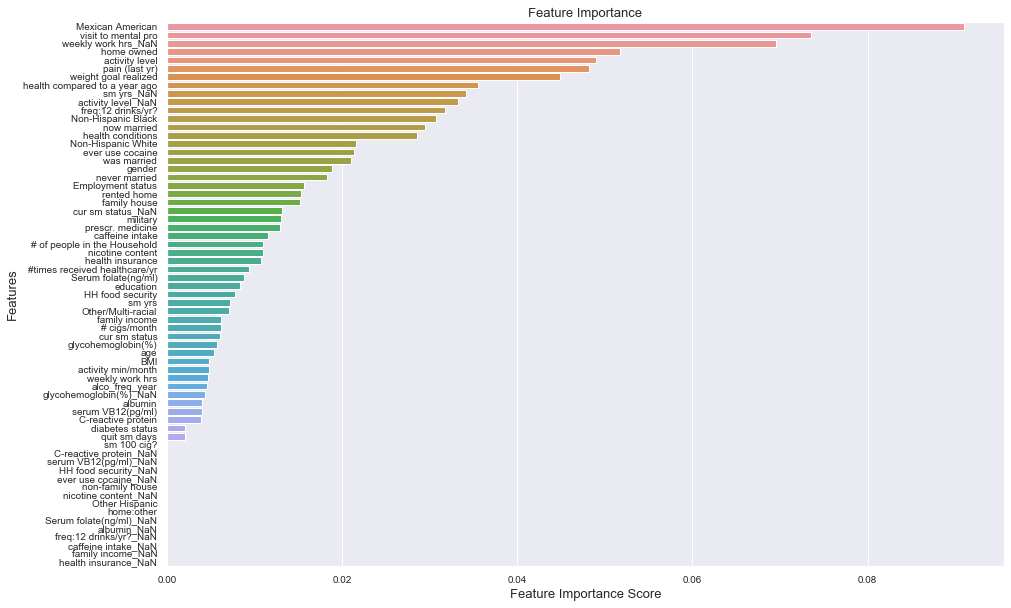

In [317]:
featimp = feature_importance(xgb1[1],X_names)

In [318]:
xgb12 = fit_and_predict(pipeline1,'xgb: Baseline(vif features)', X_train[vif_features].values, y_train.values, X_val[vif_features].values, y_val.values)

feature importance
visit to mental pro              0.116000
weight goal realized             0.092058
weekly work hrs_NaN              0.089722
pain (last yr)                   0.076090
activity level_NaN               0.060259
non-family house                 0.050656
Non-Hispanic White               0.046767
prescr. medicine                 0.046565
rented home                      0.038141
was married                      0.037439
gender                           0.030762
sm 100 cig?                      0.030703
caffeine intake                  0.021569
# of people in the Household     0.021084
Non-Hispanic Black               0.018769
nicotine content                 0.015848
Other/Multi-racial               0.014623
ever use cocaine                 0.014388
#times received healthcare/yr    0.013062
albumin_NaN                      0.010906
health insurance                 0.010571
HH food security                 0.010494
age                              0.010038
sm yrs         

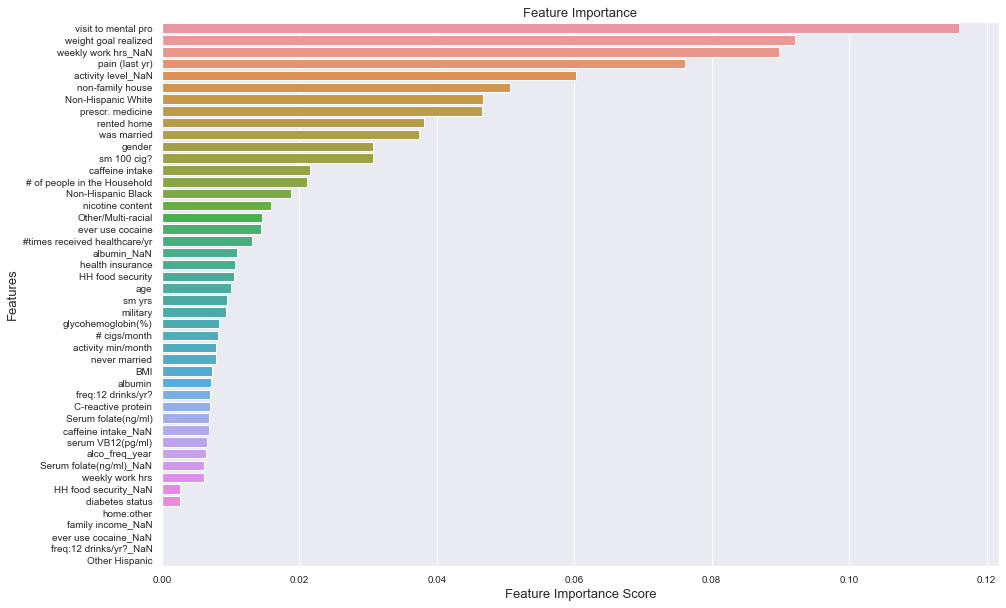

In [319]:
featimp = feature_importance(xgb12[1],vif_features)

In [320]:
# highest roc_auc at threshold = 0.07
thresholds = [0,0.002,0.004,0.005,0.007,0.01,0.015,0.02,0.03,0.04,0.05]
for threshold in thresholds:
    sfm = SelectFromModel(xgb, threshold=threshold)
    pipeline0 = Pipeline([('sm', sm), 
                          ('sfm', sfm),
                          ('xgb', xgb)])

    xgb2 = fit_and_predict(pipeline0, 'xgb: Featimp(original feature) at threshold '+str(threshold), X_train, y_train, X_val, y_val)
    

In [321]:
thresholds = [0,0.002,0.006,0.007,0.008,0.009,0.01,0.013,0.015,0.02,0.03,0.04,0.05,0.06,0.07]
for threshold in thresholds:
    sfm = SelectFromModel(xgb, threshold=threshold)
    pipeline0 = Pipeline([('sm', sm), 
                          ('sfm', sfm),
                          ('xgb', xgb)])

    xgb2 = fit_and_predict(pipeline0, 'xgb: Featimp(vif feature) at threshold '+str(threshold), X_train[vif_features], y_train, X_val[vif_features], y_val)


In [322]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
8,xgb: Featimp(original feature) at threshold 0.015,0.912409,0.926136,0.181818,0.234234,0.400000,0.812500,0.250000,0.363636,0.579004,0.614441
7,xgb: Featimp(original feature) at threshold 0.01,0.919708,0.928571,0.090909,0.243243,0.500000,0.870968,0.153846,0.380282,0.541486,0.619838
26,xgb: Featimp(vif feature) at threshold 0.06,0.912409,0.912338,0.090909,0.135135,0.333333,0.555556,0.142857,0.217391,0.537518,0.562215
25,xgb: Featimp(vif feature) at threshold 0.05,0.912409,0.910714,0.090909,0.135135,0.333333,0.517241,0.142857,0.214286,0.537518,0.561323
24,xgb: Featimp(vif feature) at threshold 0.04,0.912409,0.912338,0.090909,0.099099,0.333333,0.578947,0.142857,0.169231,0.537518,0.545981
12,xgb: Featimp(original feature) at threshold 0.05,0.890511,0.902597,0.090909,0.225225,0.166667,0.423729,0.117647,0.294118,0.525613,0.597448
21,xgb: Featimp(vif feature) at threshold 0.015,0.919708,0.920455,0.000000,0.189189,0.000000,0.724138,0.000000,0.300000,0.500000,0.591026
23,xgb: Featimp(vif feature) at threshold 0.03,0.919708,0.913149,0.000000,0.108108,0.000000,0.600000,0.000000,0.183206,0.500000,0.550486
19,xgb: Featimp(vif feature) at threshold 0.01,0.919708,0.926948,0.000000,0.243243,0.000000,0.818182,0.000000,0.375000,0.500000,0.618945
13,xgb: Featimp(vif feature) at threshold 0,0.912409,0.935877,0.000000,0.306306,0.000000,0.944444,0.000000,0.462585,0.496032,0.652261


In [323]:
clear_model_results()

In [324]:
# original features at 0.015 is the best
threshold = 0.015
sfm = SelectFromModel(xgb, threshold=threshold)
pipeline0 = Pipeline([('sm', sm), 
                      ('sfm', sfm),
                      ('xgb', xgb)])

xgb3 = fit_and_predict(pipeline0, 'xgb: Feature importance at threshold '+str(threshold), X_train, y_train, X_val, y_val)


In [325]:
chosen_feature_indices = xgb3[1].get_support(indices=True)
xgb_features = [X_names[i] for i in chosen_feature_indices]
xgb_features

['Employment status',
 'Mexican American',
 'Non-Hispanic Black',
 'Non-Hispanic White',
 'activity level',
 'activity level_NaN',
 'ever use cocaine',
 'family house',
 'freq:12 drinks/yr?',
 'gender',
 'health compared to a year ago',
 'health conditions',
 'home owned',
 'never married',
 'now married',
 'pain (last yr)',
 'rented home',
 'sm yrs_NaN',
 'visit to mental pro',
 'was married',
 'weekly work hrs_NaN',
 'weight goal realized']

In [326]:
xgb_grid =  {'xgb1__min_child_weight': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)],
             'xgb1__gamma': [0.5, 1, 1.5, 2, 5],
             'xgb1__subsample': np.linspace(0.1, 1, 10, endpoint=True),
             'xgb1__colsample_bytree': np.linspace(0.1, 1, 10, endpoint=True),
             'xgb1__max_depth': [int(x) for x in np.linspace(start = 1, stop = 100, num = 20)]}


xgb5 = hyperparameters(pipeline1,'random',xgb_grid) 
xgb5 = fit_and_predict(xgb5, 'xgb: Feature importance + random search 1', X_train[xgb_features].values, y_train.values, X_val[xgb_features].values, y_val.values)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.1s finished


In [327]:
xgb5.best_params_

{'xgb1__subsample': 0.7000000000000001,
 'xgb1__min_child_weight': 42,
 'xgb1__max_depth': 73,
 'xgb1__gamma': 2,
 'xgb1__colsample_bytree': 0.30000000000000004}

In [328]:
xgb_grid =  {'xgb1__min_child_weight': [1, 5, 10],
             'xgb1__gamma': [0.5, 1, 1.5, 2, 5],
             'xgb1__subsample': [0.6, 0.8, 1.0],
             'xgb1__colsample_bytree': [0.6, 0.8, 1.0],
             'xgb1__max_depth': [3, 4, 5]}

xgb6 = hyperparameters(pipeline1,'random',xgb_grid) 
xgb6 = fit_and_predict(xgb6, 'xgb: Feature importance + random search 2', X_train[xgb_features].values, y_train.values, X_val[xgb_features].values, y_val.values)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    5.5s finished


In [329]:
xgb6.best_params_

{'xgb1__subsample': 0.6,
 'xgb1__min_child_weight': 10,
 'xgb1__max_depth': 3,
 'xgb1__gamma': 1,
 'xgb1__colsample_bytree': 0.6}

In [330]:
best_xgb = xgb5.best_estimator_

<Figure size 360x216 with 0 Axes>

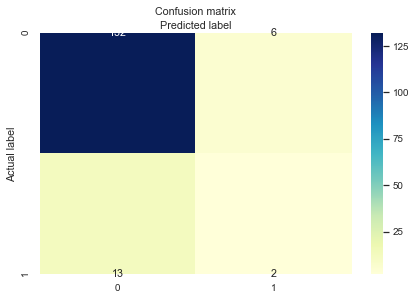

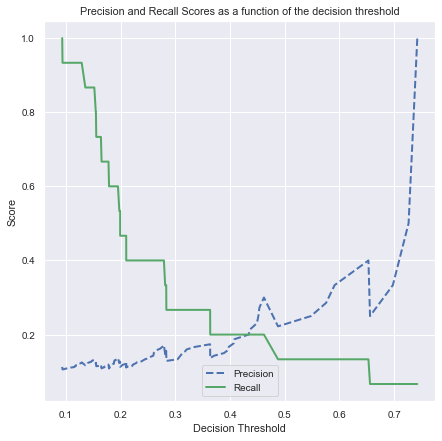

In [331]:
best_xgb_test = fit_and_predict(best_xgb, 'xgb: Best on test', X_train[xgb_features].values, y_train.values, X_test[xgb_features].values, y_test.values)


In [332]:
baseline_xgb_test = fit_and_predict(pipeline1, 'xgb: Baseline on test', X_train.values, y_train.values, X_test.values, y_test.values)


In [333]:
plot_learning_curve(best_xgb,X_train_val[xgb_features].values)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

In [ ]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

### Kendall

In [334]:
# drop 'quit sm days' bc due to pearson check among numerical features before this is redundant with another smoke feature
numerical_features_1 = [v for v in numerical_variables if v!= 'quit sm days'] 

relevant
alco_freq_year                  0.010647
Serum folate(ng/ml)             0.010773
weekly work hrs                 0.010785
nicotine content                0.012752
albumin                         0.023678
age                             0.039199
caffeine intake                 0.041041
# cigs/month                    0.051177
# of people in the Household    0.089315
Depression                      1.000000
Name: Depression, dtype: float64

irrelevant
['sm yrs', 'BMI', 'activity min/month', 'serum VB12(pg/ml)', 'glycohemoglobin(%)', 'C-reactive protein']

kendall pick these features:
['alco_freq_year', 'Serum folate(ng/ml)', 'weekly work hrs', 'nicotine content', 'albumin', 'age', 'caffeine intake', '# cigs/month', '# of people in the Household']


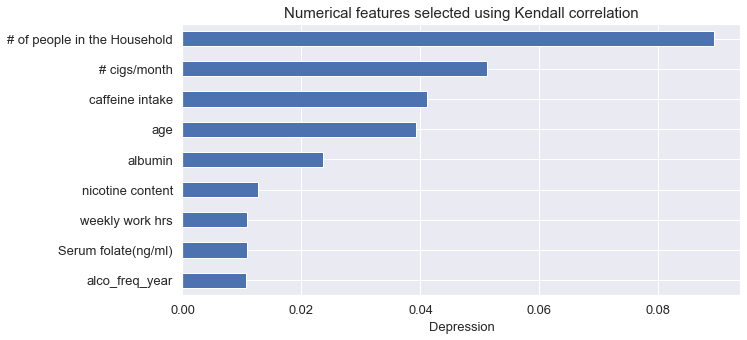

In [336]:
# kendall - filter method
# between numerical variables and y -> all numerical but 'quit sm days' ruled out by previous pearson check

correlation_coefficient = 0.01
def feature_target_correlation(df,threshold):
    cor = df[numerical_variables_1+['Depression']].corr(method='kendall')
    cor_target = abs(cor['Depression'])
    irrelevant_features = cor_target[cor_target<threshold]
    relevant_features = cor_target[cor_target>threshold].sort_values(ascending=True)
    print('relevant')
    print(relevant_features)
    print()
    print('irrelevant')
    print(list(irrelevant_features.index))
    relevant_features[:-1].plot(figsize = (10, 5),kind='barh',fontsize=13)
    plt.title('Numerical features selected using Kendall correlation',fontsize = 15)
    plt.xlabel('Depression',fontsize=13)
    

    return list(relevant_features.index)[:-1]

kendall_features = feature_target_correlation(df,correlation_coefficient)
print()
print('kendall pick these features:')
print(kendall_features)

### CHI2

In [337]:
# Check relationship with y: chi-square test
def chi2(cat_variables):
    remove_list_chi = []
    chi_features = []
    for categorical_variable in cat_variables:
        csq = chi2_contingency(pd.crosstab(y, df[categorical_variable]))
        p_value = csq[1]
        if p_value>0.05: 
            print(categorical_variable)
            print("P-value: ", p_value)
            remove_list_chi.append(categorical_variable)
        else: pass
    print('these are removed:')
    print(remove_list_chi)
    for v in cat_variables:
        if v not in remove_list_chi:
            chi_features.append(v)
    return chi_features

In [338]:
chi_original_features = chi2(categorical_variables)

education
P-value:  0.6458320958474235
HH food security
P-value:  0.3280791790148577
activity level
P-value:  0.9390843413981299
cur sm status
P-value:  0.1777299345522653
was married
P-value:  0.05876350780766756
never married
P-value:  0.16652430934863088
non-family house
P-value:  0.9405585824472313
family house
P-value:  0.9405585824472313
Other Hispanic
P-value:  0.5196865560605277
Non-Hispanic Black
P-value:  0.4001944427605977
Other/Multi-racial
P-value:  0.43770084791576325
home owned
P-value:  0.2905378596459355
rented home
P-value:  0.27048754069313774
home:other
P-value:  0.8784351738581775
gender
P-value:  0.16721242421371235
military
P-value:  0.20042766095714604
freq:12 drinks/yr?
P-value:  0.13340375389871278
weight goal realized
P-value:  0.100186078353783
diabetes status
P-value:  0.9551181937476095
health insurance
P-value:  0.8581200729409343
family income_NaN
P-value:  0.6965517779542904
HH food security_NaN
P-value:  0.9630552996531716
freq:12 drinks/yr?_NaN
P-valu

In [339]:
print(chi_original_features)

['family income', 'health conditions', 'health compared to a year ago', '#times received healthcare/yr', 'now married', 'Mexican American', 'Non-Hispanic White', 'visit to mental pro', 'sm 100 cig?', 'ever use cocaine', 'Employment status', 'pain (last yr)', 'prescr. medicine', 'weekly work hrs_NaN', 'cur sm status_NaN', 'sm yrs_NaN', 'nicotine content_NaN']


In [340]:
vif_categorical_features = [v for v in vif_features if v in categorical_variables]

chi_vif_features = chi2(vif_categorical_features)

HH food security
P-value:  0.3280791790148577
HH food security_NaN
P-value:  0.9630552996531716
Non-Hispanic Black
P-value:  0.4001944427605977
Other Hispanic
P-value:  0.5196865560605277
Other/Multi-racial
P-value:  0.43770084791576325
Serum folate(ng/ml)_NaN
P-value:  0.351637393670158
activity level_NaN
P-value:  0.5891849112996732
albumin_NaN
P-value:  0.05128398001471922
caffeine intake_NaN
P-value:  0.31684624565376374
diabetes status
P-value:  0.9551181937476095
ever use cocaine_NaN
P-value:  0.3799645773968139
family income_NaN
P-value:  0.6965517779542904
freq:12 drinks/yr?
P-value:  0.13340375389871278
freq:12 drinks/yr?_NaN
P-value:  0.9377045871775068
gender
P-value:  0.16721242421371235
health insurance
P-value:  0.8581200729409343
home:other
P-value:  0.8784351738581775
military
P-value:  0.20042766095714604
never married
P-value:  0.16652430934863088
non-family house
P-value:  0.9405585824472313
rented home
P-value:  0.27048754069313774
was married
P-value:  0.0587635078

In [341]:
print(chi_vif_features)

['#times received healthcare/yr', 'Non-Hispanic White', 'ever use cocaine', 'pain (last yr)', 'prescr. medicine', 'sm 100 cig?', 'visit to mental pro', 'weekly work hrs_NaN']


In [342]:
chi_orginal_kendall_features = chi_original_features + kendall_features
chi_vif_kendall_features = chi_vif_features + kendall_features

### ANOVA

In [343]:
# ANOVA for numerical features, pick the top 5 features
k_best = SelectKBest(f_classif, k=5)
k_best.fit_transform(X_train[numerical_variables_1], y_train)
k_best.pvalues_
p_values = pd.DataFrame({'Feature': X_train[numerical_variables_1].columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
p_values.head(5)

,Feature,p_value
14,# of people in the Household,0.000014
6,# cigs/month,0.001939
12,albumin,0.070619
0,age,0.115605
8,Serum folate(ng/ml),0.141488


In [344]:
ANOVA_features = list(p_values['Feature'][:5])

In [345]:
chi_original_anova_features = chi_original_features + ANOVA_features
print(chi_original_anova_features)

['family income', 'health conditions', 'health compared to a year ago', '#times received healthcare/yr', 'now married', 'Mexican American', 'Non-Hispanic White', 'visit to mental pro', 'sm 100 cig?', 'ever use cocaine', 'Employment status', 'pain (last yr)', 'prescr. medicine', 'weekly work hrs_NaN', 'cur sm status_NaN', 'sm yrs_NaN', 'nicotine content_NaN', '# of people in the Household', '# cigs/month', 'albumin', 'age', 'Serum folate(ng/ml)']


In [346]:
chi_vif_anova_features = chi_vif_features + ANOVA_features
print(chi_vif_anova_features)

['#times received healthcare/yr', 'Non-Hispanic White', 'ever use cocaine', 'pain (last yr)', 'prescr. medicine', 'sm 100 cig?', 'visit to mental pro', 'weekly work hrs_NaN', '# of people in the Household', '# cigs/month', 'albumin', 'age', 'Serum folate(ng/ml)']


### Backward Elimination

In [347]:
def backward_elimiation(names):
    cols = list(names)
    pmax = 1
    while (len(cols)>0):
        p= []
        X_1 = X_train[cols]
        X_1 = sms.add_constant(X_1)
        model = sms.OLS(y_train,X_1).fit()
        p = pd.Series(model.pvalues.values[1:],index = cols)      
        pmax = max(p)
        feature_with_p_max = p.idxmax()
        if(pmax>0.05):
            cols.remove(feature_with_p_max)
        else:
            break
    selected_features_BE = cols
    return selected_features_BE

In [348]:
be_original_features = backward_elimiation(X_names)

be_vif_features = backward_elimiation(vif_features)

In [349]:
print(be_original_features)

['# of people in the Household', 'health conditions', 'sm yrs_NaN', 'visit to mental pro', 'weekly work hrs_NaN']


In [350]:
print(be_vif_features)

['# of people in the Household', 'albumin_NaN', 'pain (last yr)', 'sm 100 cig?', 'visit to mental pro', 'weekly work hrs_NaN']


### Random forest feature importance 

In [351]:
rf_original_features

['Employment status',
 'Non-Hispanic White',
 'health compared to a year ago',
 'pain (last yr)',
 'visit to mental pro']

### XGBoost feature importance 

In [352]:
xgb_features # only original no vif for xgb bc vif for xgb gives much worse result

['Employment status',
 'Mexican American',
 'Non-Hispanic Black',
 'Non-Hispanic White',
 'activity level',
 'activity level_NaN',
 'ever use cocaine',
 'family house',
 'freq:12 drinks/yr?',
 'gender',
 'health compared to a year ago',
 'health conditions',
 'home owned',
 'never married',
 'now married',
 'pain (last yr)',
 'rented home',
 'sm yrs_NaN',
 'visit to mental pro',
 'was married',
 'weekly work hrs_NaN',
 'weight goal realized']

### Recursive feature elimination: this needs to be done with model training

In [353]:
# This needs to be used with model training, not separately 
from sklearn.feature_selection import RFE

num_features = 15
    
def recursive_feature_elimination(rfe,names):
    chosen_vars = []
    for i in range(len(rfe.support_)):
        if rfe.support_[i] == True:
            chosen_vars.append(names[i])
    print(len(chosen_vars), "features are chosen through RFE and they are", chosen_vars)
    return chosen_vars

### Feature choices


In [354]:
feature_choices = {'chi_orginal_kendall_features': chi_orginal_kendall_features,
                   'chi_vif_kendall_features':chi_vif_kendall_features,
                   
                   'chi_original_anova_features':chi_original_anova_features,
                   'chi_vif_anova_features':chi_vif_anova_features,
                   
                   'be_original_features':be_original_features,
                   'be_vif_features':be_vif_features,
                   
                   'vif_features': vif_features,
                   'rf_original_features': rf_original_features,
                   'xgb_original_features':xgb_features}

#### Attempt 3:  Logistic Regression
* A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression. 

In [355]:
clear_model_results()

In [356]:
# logreg: default L2
logreg = LogisticRegression(random_state=0,n_jobs=-1)
pipeline1 = Pipeline([('sm', sm), ('logreg', logreg)])

lr1 = fit_and_predict(pipeline1, 'lr: Baseline',X_train, y_train, X_val, y_val)

In [357]:
# lasso
logreg = LogisticRegression(penalty='l1',n_jobs =-1,solver='liblinear',random_state=0)
pipeline2 = Pipeline([('sm', sm), ('logreg', logreg)])
lr2 = fit_and_predict(pipeline2, 'lr: lasso',X_train, y_train, X_val, y_val)

In [358]:
# logreg with different feature selection
for name, features in feature_choices.items():
    lr = fit_and_predict(pipeline1, 'lr: '+' '+name,X_train[features],y_train, X_val[features], y_val)

In [359]:
# logreg feature selection cont.
# logreg + RFE: number of feature = 5 gives the best result
# feature_num = 5
nums = [5,7,9,11,13,15,17,19,20]
for feature_num in nums:
    logreg = LogisticRegression(n_jobs=-1)
    rfe_logreg = RFE(logreg,feature_num)
    pipeline3 = Pipeline([('sm', sm), ('rfe_logreg', rfe_logreg)])
    lr_rfe = fit_and_predict(pipeline3, 'lr: RFE(original) '+str(feature_num), X_train,y_train, X_val, y_val)
    lr_rfe_features = recursive_feature_elimination(lr_rfe[1],X_train.columns.tolist())

5 features are chosen through RFE and they are ['HH food security_NaN', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'visit to mental pro']
7 features are chosen through RFE and they are ['HH food security_NaN', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'military', 'visit to mental pro', 'weekly work hrs_NaN']
9 features are chosen through RFE and they are ['HH food security_NaN', 'Non-Hispanic Black', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'military', 'visit to mental pro', 'was married', 'weekly work hrs_NaN']
11 features are chosen through RFE and they are ['HH food security_NaN', 'Non-Hispanic Black', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'glycohemoglobin(%)_NaN', 'military', 'serum VB12(pg/ml)_NaN', 'visit to mental pro', 'was married', 'weekly work hrs_NaN']
13 features are chosen through RFE and they are ['HH food security_NaN', 'Non-Hispanic Black', 'Serum folate(ng/ml)_NaN', 'al

In [360]:
nums = range(4,20)
for num in nums:
    logreg = LogisticRegression(n_jobs=-1)
    rfe_logreg = RFE(logreg,num)
    pipeline3 = Pipeline([('sm', sm), ('rfe_logreg', rfe_logreg)])
    lr_rfe = fit_and_predict(pipeline3, 'lr: RFE(vif) '+str(feature_num), X_train[vif_features],y_train, X_val[vif_features], y_val)
    lr_rfe_features = recursive_feature_elimination(lr_rfe[1],vif_features)


4 features are chosen through RFE and they are ['Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'visit to mental pro']
5 features are chosen through RFE and they are ['HH food security_NaN', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'visit to mental pro']
6 features are chosen through RFE and they are ['HH food security_NaN', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'ever use cocaine_NaN', 'visit to mental pro', 'weekly work hrs_NaN']
7 features are chosen through RFE and they are ['HH food security_NaN', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'caffeine intake_NaN', 'ever use cocaine_NaN', 'visit to mental pro', 'weekly work hrs_NaN']
8 features are chosen through RFE and they are ['HH food security_NaN', 'Other/Multi-racial', 'Serum folate(ng/ml)_NaN', 'albumin_NaN', 'caffeine intake_NaN', 'ever use cocaine_NaN', 'visit to mental pro', 'weekly work hrs_NaN']
9 features are chosen through RFE and they are ['HH food security_NaN', 'Non-Hispa

In [361]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
34,lr: lasso,0.700730,0.745130,0.545455,0.684685,0.142857,0.214085,0.226415,0.326180,0.629870,0.717900
20,lr: RFE(vif) 20,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
21,lr: RFE(vif) 20,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
16,lr: RFE(original) 5,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
9,lr: Baseline,0.700730,0.747565,0.454545,0.684685,0.125000,0.215909,0.196078,0.328294,0.588384,0.719238
22,lr: RFE(vif) 20,0.693431,0.689935,0.454545,0.594595,0.121951,0.163772,0.192308,0.256809,0.584416,0.646985
23,lr: RFE(vif) 20,0.693431,0.672890,0.454545,0.603604,0.121951,0.157277,0.192308,0.249534,0.584416,0.641677
24,lr: RFE(vif) 20,0.693431,0.672078,0.454545,0.603604,0.121951,0.156909,0.192308,0.249071,0.584416,0.641231
0,lr: be_original_features,0.693431,0.724026,0.454545,0.585586,0.121951,0.181058,0.192308,0.276596,0.584416,0.661660
25,lr: RFE(vif) 20,0.802920,0.793019,0.272727,0.504505,0.136364,0.218750,0.181818,0.305177,0.560967,0.663046


In [362]:
# all features gives the best...
# use this for grid search
grid1 = {'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lr3 = hyperparameters(pipeline1, 'gridsearch', grid1)
lr3 = fit_and_predict(lr3,'lr: all features + grid search 1',X_train, y_train, X_val, y_val)

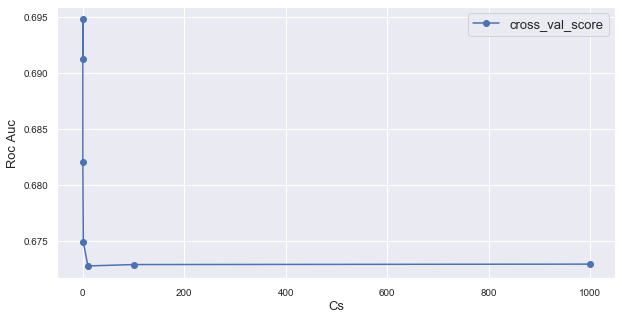

In [363]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
scores = []
for C in Cs:
    logreg = LogisticRegression(C=C,random_state=0,penalty='l2',n_jobs=-1)
    pipeline0 = Pipeline([('sm',sm),('logreg', logreg)])
    scores.append(generate_parameter_score(pipeline0,X_train[xgb_features]))

plot_parameter_scores(Cs,'Cs',scores)

In [364]:
lr3.best_params_

{'logreg__C': 0.001}

In [365]:
# feature selection and gridsearch para both decrease performance...
best_lr = lr1

<Figure size 360x216 with 0 Axes>

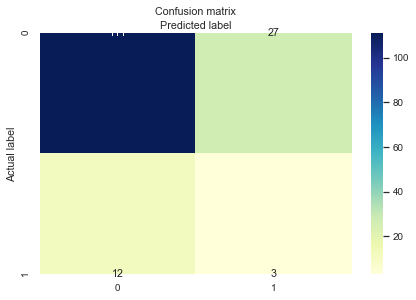

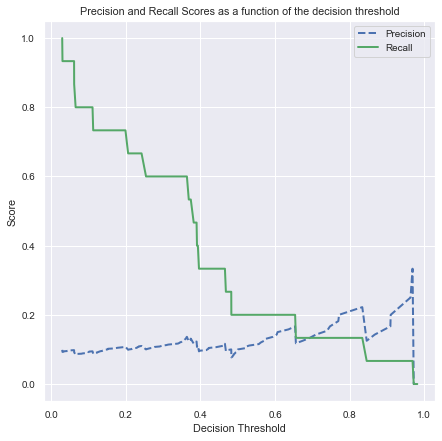

In [366]:
best_lr_on_test = fit_and_predict(best_lr,'lr: Best on test',X_train, y_train, X_test, y_test)

In [367]:
baseline_lr_test = fit_and_predict(pipeline1, 'lr: Baseline on test', X_train, y_train, X_test, y_test)

In [368]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
37,lr: lasso,0.700730,0.745130,0.545455,0.684685,0.142857,0.214085,0.226415,0.326180,0.629870,0.717900
31,lr: RFE(vif) 20,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
32,lr: RFE(vif) 20,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
17,lr: RFE(original) 5,0.890511,0.882305,0.272727,0.297297,0.300000,0.330000,0.285714,0.312796,0.608586,0.618765
9,lr: Baseline,0.700730,0.747565,0.454545,0.684685,0.125000,0.215909,0.196078,0.328294,0.588384,0.719238
29,lr: RFE(vif) 20,0.693431,0.672078,0.454545,0.603604,0.121951,0.156909,0.192308,0.249071,0.584416,0.641231
30,lr: RFE(vif) 20,0.693431,0.672890,0.454545,0.603604,0.121951,0.157277,0.192308,0.249534,0.584416,0.641677
35,lr: RFE(vif) 20,0.693431,0.689935,0.454545,0.594595,0.121951,0.163772,0.192308,0.256809,0.584416,0.646985
0,lr: be_original_features,0.693431,0.724026,0.454545,0.585586,0.121951,0.181058,0.192308,0.276596,0.584416,0.661660
34,lr: RFE(vif) 20,0.802920,0.793019,0.272727,0.504505,0.136364,0.218750,0.181818,0.305177,0.560967,0.663046


In [369]:
plot_learning_curve(best_lr,X_train_val)

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

##### this learning curve is the only one showing the correct trend... although the best model in this case is baseline...

#### Attempt 4: knn



In [370]:
clear_model_results()

In [371]:
knn = KNeighborsClassifier(n_jobs=-1)
pipeline1 = Pipeline([('sm', sm),('knn', knn)])
knn1 = fit_and_predict(pipeline1,'knn: Baseline', X_train, y_train, X_val, y_val)

In [372]:
# knn with different feature selection, knn has no RFE
for name, features in feature_choices.items():
    print(name)
    knn = fit_and_predict(pipeline1, 'knn: '+name,X_train[features],y_train, X_val[features], y_val)

chi_orginal_kendall_features
chi_vif_kendall_features
chi_original_anova_features
chi_vif_anova_features
be_original_features
be_vif_features
vif_features
rf_original_features
xgb_original_features


In [373]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
5,knn: chi_vif_anova_features,0.700730,0.835227,0.454545,1.000000,0.125000,0.353503,0.196078,0.522353,0.588384,0.909456
3,knn: chi_orginal_kendall_features,0.671533,0.807630,0.454545,1.000000,0.113636,0.318966,0.181818,0.483660,0.572511,0.894291
7,knn: rf_original_features,0.897810,0.905032,0.181818,0.243243,0.285714,0.450000,0.222222,0.315789,0.571068,0.606903
9,knn: xgb_original_features,0.715328,0.810065,0.363636,0.990991,0.111111,0.320700,0.170213,0.484581,0.554834,0.891570
2,knn: be_vif_features,0.854015,0.899351,0.181818,0.414414,0.153846,0.438095,0.166667,0.425926,0.547258,0.680891
4,knn: chi_original_anova_features,0.693431,0.821429,0.363636,1.000000,0.102564,0.335347,0.160000,0.502262,0.542929,0.901873
0,knn: Baseline,0.576642,0.719156,0.454545,1.000000,0.087719,0.242888,0.147059,0.390845,0.520924,0.845674
6,knn: chi_vif_kendall_features,0.642336,0.818182,0.363636,0.990991,0.086957,0.330330,0.140351,0.495495,0.515152,0.896031
1,knn: be_original_features,0.759124,0.823864,0.090909,0.531532,0.041667,0.263393,0.057143,0.352239,0.454185,0.692171
8,knn: vif_features,0.525547,0.715909,0.363636,1.000000,0.064516,0.240781,0.109589,0.388112,0.451659,0.843889


##### knn: rf_original_features is the best since the highest two are severly overfitted despite higher roc auc.

* small k: low bias, high variance; large k: high bias, low variance

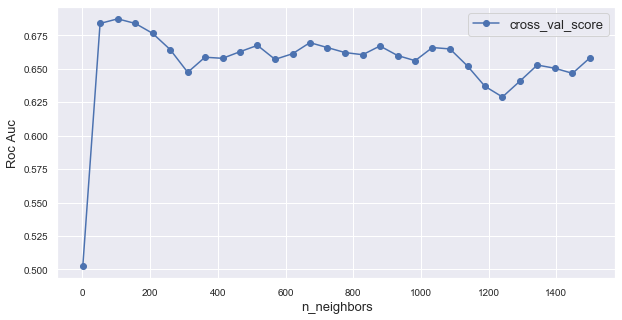

In [374]:
n_neighbors =  [int(x) for x in np.linspace(start = 1, stop = 1500, num = 30)]
scores = []
for n_neighbor in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n_neighbor,n_jobs=-1)
    pipeline0 = Pipeline([('sm',sm),('knn', knn)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(n_neighbors,'n_neighbors',scores)

##### This graph is RIDICULOUS

In [375]:
knn_grid1 = {'knn__n_neighbors': [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]}

knn2 = hyperparameters(pipeline1, 'gridsearch', knn_grid1)
knn2 = fit_and_predict(knn2,'knn: rf_original_features + grid search 1',X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)


In [376]:
knn2.best_params_

{'knn__n_neighbors': 163}

In [377]:
knn_grid2 =  {'knn__metric': ['euclidean','manhattan','minkowski'],
             'knn__weights': ['uniform','distance'],
             'knn__n_neighbors': [int(x) for x in np.linspace(start = 2, stop = 1000, num = 20)]}

knn3 = hyperparameters(pipeline1, 'gridsearch', knn_grid2)
knn3 = fit_and_predict(knn3,'knn: rf_original_features + grid search 2',X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)


In [378]:
knn3.best_params_

{'knn__metric': 'manhattan',
 'knn__n_neighbors': 947,
 'knn__weights': 'uniform'}

In [379]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
5,knn: chi_vif_anova_features,0.700730,0.835227,0.454545,1.000000,0.125000,0.353503,0.196078,0.522353,0.588384,0.909456
3,knn: chi_orginal_kendall_features,0.671533,0.807630,0.454545,1.000000,0.113636,0.318966,0.181818,0.483660,0.572511,0.894291
7,knn: rf_original_features,0.897810,0.905032,0.181818,0.243243,0.285714,0.450000,0.222222,0.315789,0.571068,0.606903
8,knn: rf_original_features + grid search 1,0.795620,0.821429,0.272727,0.423423,0.130435,0.231527,0.176471,0.299363,0.556999,0.642131
10,knn: xgb_original_features,0.715328,0.810065,0.363636,0.990991,0.111111,0.320700,0.170213,0.484581,0.554834,0.891570
2,knn: be_vif_features,0.854015,0.899351,0.181818,0.414414,0.153846,0.438095,0.166667,0.425926,0.547258,0.680891
4,knn: chi_original_anova_features,0.693431,0.821429,0.363636,1.000000,0.102564,0.335347,0.160000,0.502262,0.542929,0.901873
11,knn: rf_original_features + grid search 2,0.839416,0.859578,0.181818,0.297297,0.133333,0.257812,0.153846,0.276151,0.539322,0.606276
0,knn: Baseline,0.576642,0.719156,0.454545,1.000000,0.087719,0.242888,0.147059,0.390845,0.520924,0.845674
6,knn: chi_vif_kendall_features,0.642336,0.818182,0.363636,0.990991,0.086957,0.330330,0.140351,0.495495,0.515152,0.896031


###### knn2 and knn3 show same result: gridsearch changes nothing... 


In [380]:
best_knn = knn2.best_estimator_

<Figure size 360x216 with 0 Axes>

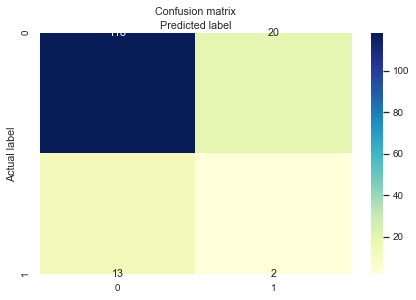

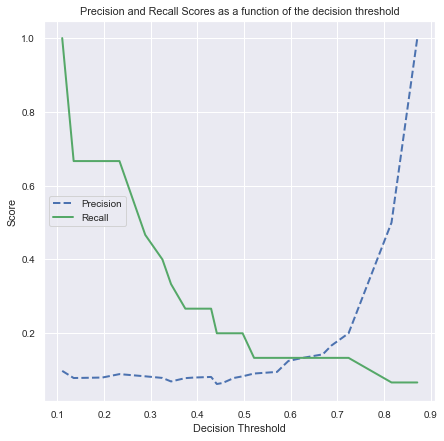

In [381]:
best_knn_on_test = fit_and_predict(best_knn,'knn: Best on test',X_train[rf_original_features], y_train, X_test[rf_original_features], y_test)
baseline_knn_test = fit_and_predict(pipeline1, 'knn: Baseline on test', X_train, y_train, X_test, y_test)


In [382]:
model_results.sort_values(by=['Roc Auc'],ascending=False)

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
6,knn: chi_vif_anova_features,0.700730,0.835227,0.454545,1.000000,0.125000,0.353503,0.196078,0.522353,0.588384,0.909456
4,knn: chi_orginal_kendall_features,0.671533,0.807630,0.454545,1.000000,0.113636,0.318966,0.181818,0.483660,0.572511,0.894291
8,knn: rf_original_features,0.897810,0.905032,0.181818,0.243243,0.285714,0.450000,0.222222,0.315789,0.571068,0.606903
9,knn: rf_original_features + grid search 1,0.795620,0.821429,0.272727,0.423423,0.130435,0.231527,0.176471,0.299363,0.556999,0.642131
13,knn: Baseline on test,0.575163,0.719156,0.533333,1.000000,0.121212,0.242888,0.197531,0.390845,0.556522,0.845674
12,knn: xgb_original_features,0.715328,0.810065,0.363636,0.990991,0.111111,0.320700,0.170213,0.484581,0.554834,0.891570
3,knn: be_vif_features,0.854015,0.899351,0.181818,0.414414,0.153846,0.438095,0.166667,0.425926,0.547258,0.680891
5,knn: chi_original_anova_features,0.693431,0.821429,0.363636,1.000000,0.102564,0.335347,0.160000,0.502262,0.542929,0.901873
10,knn: rf_original_features + grid search 2,0.839416,0.859578,0.181818,0.297297,0.133333,0.257812,0.153846,0.276151,0.539322,0.606276
0,knn: Baseline,0.576642,0.719156,0.454545,1.000000,0.087719,0.242888,0.147059,0.390845,0.520924,0.845674


##### WHY: Baseline on test is better than best on test

#### Attempt 5: SVM - SVC

In [383]:
clear_model_results()

In [384]:
svc = SVC(probability=True)
pipeline1 = Pipeline([('sm', sm),('svc', svc)])
svc1 = fit_and_predict(pipeline1,'svc: Baseline', X_train, y_train, X_val, y_val)

In [385]:
# svc feature selection
for name, features in feature_choices.items():
    print(name)
    svc = fit_and_predict(pipeline1, 'svc: '+name,X_train[features],y_train, X_val[features], y_val)

chi_orginal_kendall_features
chi_vif_kendall_features
chi_original_anova_features
chi_vif_anova_features
be_original_features
be_vif_features
vif_features
rf_original_features
xgb_original_features


In [386]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
0,svc: Baseline,0.868613,0.938312,0.272727,0.918919,0.230769,0.603550,0.250000,0.728571,0.596681,0.929575
6,svc: chi_vif_kendall_features,0.832117,0.904221,0.272727,0.873874,0.166667,0.482587,0.206897,0.621795,0.576840,0.890550
4,svc: chi_original_anova_features,0.854015,0.897727,0.181818,0.909910,0.153846,0.465438,0.166667,0.615854,0.547258,0.903215
7,svc: rf_original_features,0.773723,0.802760,0.272727,0.558559,0.115385,0.242188,0.162162,0.337875,0.545094,0.692749
9,svc: xgb_original_features,0.766423,0.831981,0.272727,0.729730,0.111111,0.313953,0.157895,0.439024,0.541126,0.785917
3,svc: chi_orginal_kendall_features,0.839416,0.922890,0.181818,0.918919,0.133333,0.542553,0.153846,0.682274,0.539322,0.921101
2,svc: be_vif_features,0.686131,0.789773,0.363636,0.630631,0.100000,0.243056,0.156863,0.350877,0.538961,0.718081
5,svc: chi_vif_anova_features,0.817518,0.868506,0.181818,0.783784,0.111111,0.386667,0.137931,0.517857,0.527417,0.830340
8,svc: vif_features,0.846715,0.916396,0.090909,0.891892,0.083333,0.521053,0.086957,0.657807,0.501804,0.905357
1,svc: be_original_features,0.686131,0.779221,0.181818,0.666667,0.055556,0.239482,0.085106,0.352381,0.455988,0.728516


In [387]:
# rf_original_features is the best 
Cs = [0.001, 0.01, 0.1, 1, 10,100]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly']
svc_grid1 =  {'svc__C': Cs,
             'svc__gamma': gammas,
             'svc__kernel': kernels}

svc2 = hyperparameters(pipeline1,'random',svc_grid1)
svc2 = fit_and_predict(svc2,'svc: svc_rfe_vif_features + random search 1',X_train[rf_original_features], y_train, X_val[rf_original_features], y_val)



Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.0s finished


In [388]:
svc2.best_params_

{'svc__kernel': 'rbf', 'svc__gamma': 1, 'svc__C': 0.001}

In [389]:
svc # default

Pipeline(memory=None,
         steps=[('sm',
                 SMOTE(k_neighbors=5, kind='deprecated',
                       m_neighbors='deprecated', n_jobs=1,
                       out_step='deprecated', random_state=42, ratio=None,
                       sampling_strategy='auto', svm_estimator='deprecated')),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=True, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [391]:
# no change with C >= 0.01
Cs =  [0.001, 0.01, 0.1, 1, 10,100,1000]
scores = []
for C in Cs:
    svc = SVC(probability=True,kernel='linear',C=C)
    pipeline0 = Pipeline([('sm',sm),('svc', svc)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(Cs,'Cs',scores)

KeyboardInterrupt: 

In [ ]:
gammas = [0.001, 0.01, 0.1, 1]
scores = []
for gamma in gammas:
    svc = SVC(probability=True,kernel='linear',gamma=gamma)
    pipeline0 = Pipeline([('sm',sm),('svc', svc)])
    scores.append(generate_parameter_score(pipeline0,X_train[rf_original_features]))

plot_parameter_scores(gammas,'gammas',scores)

##### gridsearch param does nothing, best is default with  rf_original_features

<Figure size 360x216 with 0 Axes>

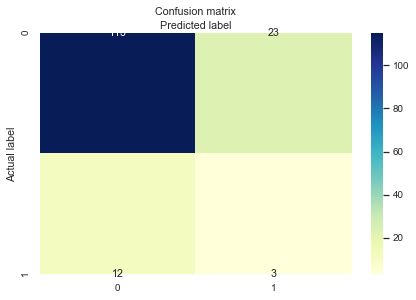

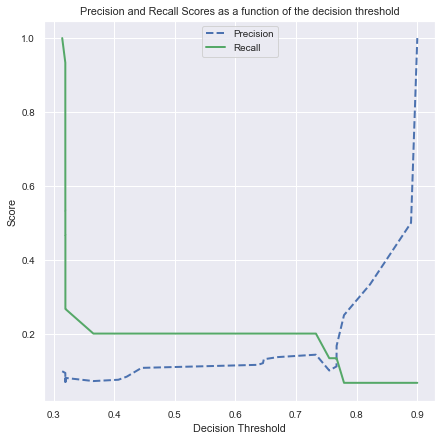

In [392]:
best_svc = fit_and_predict(pipeline1,'svc: Best on test', X_train[rf_original_features], y_train, X_test[rf_original_features], y_test)
baseline_svc_test = fit_and_predict(pipeline1, 'svc: Baseline on test', X_train, y_train, X_test, y_test)

In [393]:
model_results = model_results.sort_values(by=['Roc Auc'],ascending=False)
model_results

,Name,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
0,svc: Baseline,0.868613,0.938312,0.272727,0.918919,0.230769,0.603550,0.250000,0.728571,0.596681,0.929575
7,svc: chi_vif_kendall_features,0.832117,0.904221,0.272727,0.873874,0.166667,0.482587,0.206897,0.621795,0.576840,0.890550
5,svc: chi_original_anova_features,0.854015,0.897727,0.181818,0.909910,0.153846,0.465438,0.166667,0.615854,0.547258,0.903215
8,svc: rf_original_features,0.773723,0.802760,0.272727,0.558559,0.115385,0.242188,0.162162,0.337875,0.545094,0.692749
11,svc: xgb_original_features,0.766423,0.831981,0.272727,0.729730,0.111111,0.313953,0.157895,0.439024,0.541126,0.785917
4,svc: chi_orginal_kendall_features,0.839416,0.922890,0.181818,0.918919,0.133333,0.542553,0.153846,0.682274,0.539322,0.921101
3,svc: be_vif_features,0.686131,0.789773,0.363636,0.630631,0.100000,0.243056,0.156863,0.350877,0.538961,0.718081
6,svc: chi_vif_anova_features,0.817518,0.868506,0.181818,0.783784,0.111111,0.386667,0.137931,0.517857,0.527417,0.830340
1,svc: Best on test,0.771242,0.802760,0.200000,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749
10,svc: vif_features,0.846715,0.916396,0.090909,0.891892,0.083333,0.521053,0.086957,0.657807,0.501804,0.905357


In [394]:
plot_learning_curve(best_svc,X_train_val[rf_original_features])

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 3, n_neighbors = 6

## MODEL SUMMARY

In [395]:
results = model_results.set_index('Name')
pd.set_option('display.max_rows', None)
results = results.sort_values(by=['Roc Auc'],ascending=False)
results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
Name,,,,,,,,,,
svc: Baseline,0.868613,0.938312,0.272727,0.918919,0.230769,0.603550,0.250000,0.728571,0.596681,0.929575
svc: chi_vif_kendall_features,0.832117,0.904221,0.272727,0.873874,0.166667,0.482587,0.206897,0.621795,0.576840,0.890550
svc: chi_original_anova_features,0.854015,0.897727,0.181818,0.909910,0.153846,0.465438,0.166667,0.615854,0.547258,0.903215
svc: rf_original_features,0.773723,0.802760,0.272727,0.558559,0.115385,0.242188,0.162162,0.337875,0.545094,0.692749
svc: xgb_original_features,0.766423,0.831981,0.272727,0.729730,0.111111,0.313953,0.157895,0.439024,0.541126,0.785917
svc: chi_orginal_kendall_features,0.839416,0.922890,0.181818,0.918919,0.133333,0.542553,0.153846,0.682274,0.539322,0.921101
svc: be_vif_features,0.686131,0.789773,0.363636,0.630631,0.100000,0.243056,0.156863,0.350877,0.538961,0.718081
svc: chi_vif_anova_features,0.817518,0.868506,0.181818,0.783784,0.111111,0.386667,0.137931,0.517857,0.527417,0.830340
svc: Best on test,0.771242,0.802760,0.200000,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


In [396]:
best_models_names = ['rf: Best on test','xgb: Best on test','lr: Best on test','knn: Best on test','svc: Best on test']
baseline_models_names = ['rf: Baseline on test','xgb: Baseline on test ','lr: Baseline on test','knn: Baseline on test','svc: Baseline on test']
best_baseline_results = results.loc[results.index.intersection(best_models_names+baseline_models_names)]
best_results = results.loc[results.index.intersection(best_models_names)]
best_baseline_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.802760,0.200000,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749
svc: Baseline on test,0.830065,0.938312,0.066667,0.918919,0.076923,0.603550,0.071429,0.728571,0.489855,0.929575


rf: Best on test
xgb: Best on test
lr: Best on test
knn: Best on test
svc: Best on test


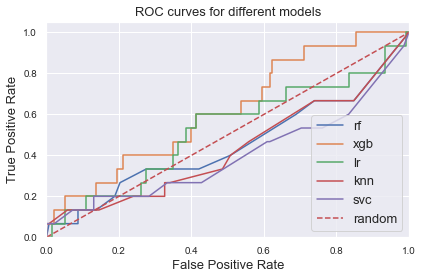

In [397]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=13)
plt.ylabel('True Positive Rate',fontsize=13)
plt.title('ROC curves for different models',fontsize=13)
legends = []

for clf,probability in best_clf_probabilities.items():
    print(clf)
    fpr, tpr, thresholds = roc_curve(y_test, probability)
    plt.plot(fpr, tpr)
    legends.append(clf[:-14])

plt.plot([0, 1], [0, 1],'r--')
legends.append('random')
plt.legend(legends,loc="lower right",fontsize=13)
plt.tight_layout()
plt.show()

In [398]:
best_results = best_results.sort_values(by=['Roc Auc'],ascending=False)
best_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.80276,0.2,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


In [231]:
best_results = best_results.sort_values(by=['F1'],ascending=False)
best_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.80276,0.2,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


In [232]:
best_results = best_results.sort_values(by=['Accuracy'],ascending=False)
best_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.80276,0.2,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


In [233]:
best_results = best_results.sort_values(by=['Recall'],ascending=False)
best_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.80276,0.2,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


In [234]:
best_results = best_results.sort_values(by=['Precision'],ascending=False)
best_results

,Accuracy,train Accuracy,Recall,train Recall,Precision,train Precision,F1,train F1,Roc Auc,train Roc Auc
svc: Best on test,0.771242,0.80276,0.2,0.558559,0.115385,0.242188,0.146341,0.337875,0.516667,0.692749


## Ensemble

In [506]:
##### RUN THIS CELL WILL CLEAR OUT model_results!!!!!!!! #####
model_results = pd.DataFrame(columns=['Name', 'Accuracy', 'Recall', 'Precision', 'F1','Roc Auc'])

In [498]:
def new_results(clf_name,accuracy,recall,precision,f1,roc_auc):
    global model_results        
    new_row = pd.DataFrame([[clf_name, accuracy, recall, precision, f1, roc_auc]], columns=model_results.columns)
    model_results = model_results.append(new_row, ignore_index=True)
    model_results = model_results.sort_values(by=['Name'])

In [499]:
def results(clf_name, y_val, y_val_pred):
    roc_auc = roc_auc_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    new_results(clf_name, accuracy, recall, precision, f1, roc_auc)

In [500]:
# best_models are models that go through: 1. feature selection 2. hyperparameter tuning 
#                                         3. fitted on train and evaluated on val and test

best_models  =  {'Random Forest':[best_rf,rf_original_features],
                 'XGBoost':[best_xgb,xgb_features],
                 'KNN':[best_knn,rf_original_features],
                 'Logistic Regression':[best_lr,X_train.columns.tolist()],
                 'SVC':[best_svc,rf_original_features]}

In [501]:
#Probabilities, predicitons and auc scores of models on the training set and Val sets

#Training set
rf_train_prob = best_rf.predict_proba(X_train[rf_original_features])
rf_train_pred = best_rf.predict(X_train[rf_original_features])

knn_train_prob = best_knn.predict_proba(X_train[rf_original_features])
knn_train_pred = best_knn.predict(X_train[rf_original_features])

lr_train_prob = best_lr.predict_proba(X_train)
lr_train_pred = best_lr.predict(X_train)

xgb_train_prob = best_xgb.predict_proba(X_train[xgb_features].values)
xgb_train_pred = best_xgb.predict(X_train[xgb_features].values)

svc_train_prob = best_svc.predict_proba(X_train)
svc_train_pred = best_svc.predict(X_train)

#Validation set
rf_val_prob = best_rf.predict_proba(X_val[rf_original_features])
rf_val_pred = best_rf.predict(X_val[rf_original_features])

knn_val_prob = best_knn.predict_proba(X_val[rf_original_features])
knn_val_pred = best_knn.predict(X_val[rf_original_features])

lr_val_prob = best_lr.predict_proba(X_val)
lr_val_pred = best_lr.predict(X_val)

xgb_val_prob = best_xgb.predict_proba(X_val[xgb_features].values)
xgb_val_pred = best_xgb.predict(X_val[xgb_features].values)

svc_val_prob = best_svc.predict_proba(X_val)
svc_val_pred = best_svc.predict(X_val)


#Test set

rf_test_prob = best_rf.predict_proba(X_test[rf_original_features])
rf_test_pred = best_rf.predict(X_test[rf_original_features])

knn_test_prob = best_knn.predict_proba(X_test[rf_original_features])
knn_test_pred = best_knn.predict(X_test[rf_original_features])

lr_test_prob = best_lr.predict_proba(X_test)
lr_test_pred = best_lr.predict(X_test)

xgb_test_prob = best_xgb.predict_proba(X_test[xgb_features].values)
xgb_test_pred = best_xgb.predict(X_test[xgb_features].values)

svc_test_prob = best_svc.predict_proba(X_test)
svc_test_pred = best_svc.predict(X_test)


#AUC Scores
rf_roc_auc = roc_auc_score(y_train, rf_train_pred)
knn_roc_auc = roc_auc_score(y_train, knn_train_pred)
svc_roc_auc = roc_auc_score(y_train, svc_train_pred)
lr_roc_auc = roc_auc_score(y_train, lr_train_pred)
xgb_roc_auc = roc_auc_score(y_train, xgb_train_pred)

In [502]:
#Dataframes for probabilities of someone with depression for Train, Val and Test sets from all the different models

df_train_prob = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb"], index= X_train.index)
for i in range(len(X_train)):
    df_train_prob["rf"].iloc[i] = rf_train_prob[i][1]
    df_train_prob["knn"].iloc[i] = knn_train_prob[i][1]
    df_train_prob["svc"].iloc[i] = svc_train_prob[i][1]
    df_train_prob["lr"].iloc[i] = lr_train_prob[i][1]
    df_train_prob["xgb"].iloc[i] = xgb_train_prob[i][1]
print("Train Probabilities")
print(df_train_prob)

df_val_prob = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb"], index= X_val.index)
for i in range(len(X_val)):
    df_val_prob["rf"].iloc[i] = rf_val_prob[i][1]
    df_val_prob["knn"].iloc[i] = knn_val_prob[i][1]
    df_val_prob["svc"].iloc[i] = svc_val_prob[i][1]
    df_val_prob["lr"].iloc[i] = lr_val_prob[i][1]
    df_val_prob["xgb"].iloc[i] = xgb_val_prob[i][1]
print("Val Probabilities")
print(df_val_prob)


df_test_prob = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb"], index= X_test.index)
for i in range(len(X_test)):
    df_test_prob["rf"].iloc[i] = rf_test_prob[i][1]
    df_test_prob["knn"].iloc[i] = knn_test_prob[i][1]
    df_test_prob["svc"].iloc[i] = svc_test_prob[i][1]
    df_test_prob["lr"].iloc[i] = lr_test_prob[i][1]
    df_test_prob["xgb"].iloc[i] = xgb_test_prob[i][1]
print("Test Probabilities")
print(df_test_prob)


#Dataframes for predictions of someone being diabetic for Train and Val sets from all different models
df_train_pred = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb", "True"], index= X_train.index)
for i in range(len(X_train)):
    df_train_pred["rf"].iloc[i] = rf_train_pred[i]
    df_train_pred["knn"].iloc[i] = knn_train_pred[i]
    df_train_pred["svc"].iloc[i] = svc_train_pred[i]
    df_train_pred["lr"].iloc[i] = lr_train_pred[i]
    df_train_pred["xgb"].iloc[i] = xgb_train_pred[i]
    df_train_pred["True"].iloc[i] = y_train.iloc[i]
print("Train Predictions")
print(df_train_pred)

df_val_pred = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb", "True"], index= X_val.index)
for i in range(len(X_val)):
    df_val_pred["rf"].iloc[i] = rf_val_pred[i]
    df_val_pred["knn"].iloc[i] = knn_val_pred[i]
    df_val_pred["svc"].iloc[i] = svc_val_pred[i]
    df_val_pred["lr"].iloc[i] = lr_val_pred[i]
    df_val_pred["xgb"].iloc[i] = xgb_val_pred[i]
    df_val_pred["True"].iloc[i] = y_val.iloc[i]
print("Val Predictions")
print(df_val_pred)



df_test_pred = pd.DataFrame(columns = ["rf", "knn", "svc", "lr", "xgb", "True"], index= X_test.index)
for i in range(len(X_test)):
    df_test_pred["rf"].iloc[i] = rf_test_pred[i]
    df_test_pred["knn"].iloc[i] = knn_test_pred[i]
    df_test_pred["svc"].iloc[i] = svc_test_pred[i]
    df_test_pred["lr"].iloc[i] = lr_test_pred[i]
    df_test_pred["xgb"].iloc[i] = xgb_test_pred[i]
    df_test_pred["True"].iloc[i] = y_test.iloc[i]

print("Test Predictions")
print(df_test_pred)


Train Probabilities
            rf       knn          svc          lr        xgb
1495  0.424518  0.233129  0.000866281    0.213638   0.219562
296   0.566509  0.521472   0.00770904    0.677291   0.508881
1398  0.482585  0.595092     0.952558    0.443195    0.55125
659   0.492098  0.496933     0.764745    0.536336   0.312924
169   0.543937  0.472393     0.163951    0.279053   0.317109
100   0.458651  0.478528    0.0103484    0.416531   0.326418
921   0.424518  0.233129    0.0258185    0.406856  0.0899118
320   0.268308  0.110429    0.0103644    0.267026   0.264778
1469   0.54458  0.570552    0.0350828    0.381541   0.204346
840   0.485771  0.453988     0.148825    0.539207   0.232762
1315  0.734656  0.588957    0.0618657    0.873234   0.717287
1513  0.485771  0.453988     0.772485    0.576942   0.377241
153   0.482585  0.595092     0.261399    0.703105   0.640182
319   0.787831  0.865031     0.807847     0.83752   0.638913
1316  0.268308  0.110429    0.0305423    0.296396   0.100363
1038

            rf       knn          svc         lr        xgb
1148  0.268308  0.110429    0.0010975   0.182024   0.114184
672   0.488832  0.343558    0.0304204   0.218392   0.303323
363   0.424518  0.233129   0.00948733   0.309513  0.0871049
188   0.492098  0.496933    0.0394799   0.483692   0.168417
210   0.488832  0.343558     0.736087   0.608946   0.306063
1149  0.374723  0.196319     0.181912   0.434248    0.41741
1507  0.424518  0.233129     0.102589   0.164754   0.116899
1051  0.492098  0.496933     0.783839   0.527231   0.295808
1224  0.268308  0.110429   0.00114038  0.0844971   0.173676
516   0.802085  0.625767     0.999995    0.99371   0.688769
404   0.424518  0.233129    0.0125302   0.688445   0.198461
657   0.268308  0.110429  0.000401223  0.0727014  0.0579701
1262  0.268308  0.110429    0.0478073   0.173616  0.0928224
1122  0.424518  0.233129  0.000479503   0.330004   0.135447
831   0.374723  0.196319      0.40829   0.211143   0.190238
48    0.522773  0.282209     0.103575   

Train Predictions
      rf  knn  svc  lr  xgb  True
1495   0    0    0   0    0     0
296    1    1    0   1    1     0
1398   0    1    1   0    1     1
659    0    0    1   1    0     1
169    1    0    0   0    0     0
100    0    0    0   0    0     0
921    0    0    0   0    0     0
320    0    0    0   0    0     0
1469   1    1    0   0    0     0
840    0    0    0   1    0     0
1315   1    1    0   1    1     0
1513   0    0    1   1    0     1
153    0    1    0   1    1     0
319    1    1    1   1    1     1
1316   0    0    0   0    0     0
1038   0    1    0   0    0     0
238    0    0    0   0    0     0
432    0    0    0   0    0     0
1494   0    0    0   0    0     0
77     1    1    0   1    0     0
1110   0    0    0   0    0     0
1135   0    0    0   0    0     0
689    1    1    0   0    0     0
1338   0    0    0   0    0     0
1242   0    0    0   0    0     0
193    0    0    0   0    0     0
368    0    0    0   0    0     0
471    0    0    0   0    0   

Test Predictions
      rf  knn  svc  lr  xgb  True
667    0    0    0   0    0     0
1144   0    0    0   0    0     0
143    0    0    0   0    0     0
472    0    0    0   0    0     0
248    0    0    0   0    0     0
45     0    0    0   0    0     0
1307   0    0    0   0    0     0
829    0    0    0   0    0     0
1508   0    0    0   0    0     0
1015   0    0    0   0    0     0
1131   1    1    1   1    1     0
1296   0    0    0   0    0     0
69     0    0    0   0    0     0
1501   0    0    0   0    0     0
756    1    1    0   1    1     0
1412   0    0    0   1    0     0
675    0    0    0   0    0     0
464    1    1    0   0    0     0
230    0    0    0   0    0     0
619    0    1    0   0    0     0
341    1    1    0   1    0     0
542    0    0    0   0    0     0
1014   0    0    0   1    0     0
494    1    0    0   0    0     0
1227   0    0    0   0    0     0
14     0    0    0   0    0     0
1467   0    0    1   0    0     0
1059   0    0    0   0    0    

In [503]:
#Test, Train and Val sets containing predicitons (Features are individual predictions of 5 different models)
X_train_ensemble = df_train_pred.loc[:, df_train_pred.columns != 'True']
y_train_ensemble = df_train_pred.loc[:, df_train_pred.columns == 'True']

X_test_ensemble = df_test_pred.loc[:, df_test_pred.columns != 'True']
y_test_ensemble = df_test_pred.loc[:, df_test_pred.columns == 'True']

X_val_ensemble = df_val_pred.loc[:, df_val_pred.columns != 'True']
y_val_ensemble = df_val_pred.loc[:, df_val_pred.columns == 'True']

### Simple Average

Averages predicted probabilities of individual models to obtain the final probability.
A threshold of p = 0.5 was used to determine if a person is diabetic or not
https://arxiv.org/pdf/1708.07480.pdf

In [507]:
#Ensemble model and predictions on the training set
ensemble_train_prob1 = (rf_train_prob + knn_train_prob + svc_train_prob + lr_train_prob + xgb_train_prob)/5

ensemble_train_pred1 = []
for i in ensemble_train_prob1:
    if i[1] > 0.5:          #i[0] = Prob(Not depressed) ; i[1] = Prob(depressed)
        value = 1
    else:
        value = 0
    ensemble_train_pred1.append(value)
#results("Simple average on Train", y_train_ensemble, ensemble_train_pred1)


#Ensemble model and predictions on the Validation set
ensemble_val_prob1 = (rf_val_prob + knn_val_prob + svc_val_prob + lr_val_prob + xgb_val_prob)/5

ensemble_val_pred1 = []
for i in ensemble_val_prob1:
    if i[1] > 0.5:
        value = 1
    else:
        value = 0
    ensemble_val_pred1.append(value)
results("Simple average on Val", y_val_ensemble, ensemble_val_pred1)


#Ensemble model and predictions on the test set
ensemble_test_prob1 = (rf_test_prob + knn_test_prob + svc_test_prob + lr_test_prob + xgb_test_prob)/5

ensemble_test_pred1 = []
for i in ensemble_test_prob1:
    if i[1] > 0.5:          #i[0] = Prob(Not diabetic) ; i[1] = Prob(Diabetic)
        value = 1
    else:
        value = 0
    ensemble_test_pred1.append(value)
results("Simple average on Test", y_test_ensemble, ensemble_test_pred1)


In [508]:
print(model_results)

                     Name  Accuracy    Recall  Precision        F1   Roc Auc
1  Simple average on Test  0.843137  0.066667   0.090909  0.076923  0.497101
0   Simple average on Val  0.868613  0.363636   0.266667  0.307692  0.638167


### AUC weighted

Probabilities are a weighted average of AUC scores. A threshold of p = 0.5 was used to determine if a person is diabetic or not
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6836338/pdf/12911_2019_Article_918.pdf

In [495]:
##### RUN THIS CELL WILL CLEAR OUT model_results!!!!!!!! ##### clear the model_results if you want to test thresholds
#model_results = pd.DataFrame(columns=['Name', 'Accuracy', 'Recall', 'Precision', 'F1','Roc Auc'])

In [510]:
#AUC weights
rf_weight = rf_roc_auc / (rf_roc_auc + knn_roc_auc + svc_roc_auc + lr_roc_auc + xgb_roc_auc)
knn_weight = knn_roc_auc / (rf_roc_auc + knn_roc_auc + svc_roc_auc + lr_roc_auc + xgb_roc_auc)
svc_weight = svc_roc_auc / (rf_roc_auc + knn_roc_auc + svc_roc_auc + lr_roc_auc + xgb_roc_auc)
lr_weight = lr_roc_auc / (rf_roc_auc + knn_roc_auc + svc_roc_auc + lr_roc_auc + xgb_roc_auc)
xgb_weight = xgb_roc_auc / (rf_roc_auc + knn_roc_auc + svc_roc_auc + lr_roc_auc + xgb_roc_auc)

#Ensemble model and predictions on the training set
ensemble_train_prob2 = (rf_weight*rf_train_prob) + (knn_train_prob*knn_weight) + (svc_train_prob*svc_weight) + (lr_train_prob*lr_weight) + (xgb_train_prob*xgb_weight)

ensemble_train_pred2 = []
for i in ensemble_train_prob2:
    if i[1] > 0.5:
        value = 1
    else:
        value = 0
    ensemble_train_pred2.append(value)
#results("AUC weighted on Train",y_train_ensemble, ensemble_train_pred2)


#Ensemble model and predictions on the Validation set
ensemble_val_prob2 = (rf_weight*rf_val_prob) + (knn_val_prob*knn_weight) + (svc_val_prob*svc_weight) + (lr_val_prob*lr_weight) + (xgb_val_prob*xgb_weight)
ensemble_val_pred2 = []
for i in ensemble_val_prob2:
    if i[1] > 0.5:
        value = 1
    else:
        value = 0
    ensemble_val_pred2.append(value)
results("AUC weighted on Val",y_val_ensemble, ensemble_val_pred2)


#test to verify thresholds. 0.5 seems to be the best
#threshold_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

#for j in threshold_values:
    #model_results = pd.DataFrame(columns=['Name', 'Accuracy', 'Recall', 'Precision', 'F1','Roc Auc'])
    #ensemble_val_pred2 = []
    #for i in ensemble_val_prob2:
        #if i[1] > j:
            #value = 1
        #else:
            #value = 0
       # ensemble_val_pred2.append(value)
    #results("AUC weighted on Val",y_val, ensemble_val_pred2)
    #print(model_results)
    


#Ensemble model and predictions on the test set
ensemble_test_prob2 = (rf_weight*rf_test_prob) + (knn_test_prob*knn_weight) + (svc_test_prob*svc_weight) + (lr_test_prob*lr_weight) + (xgb_test_prob*xgb_weight)

ensemble_test_pred2 = []
for i in ensemble_test_prob2:
    if i[1] > 0.35:
        value = 1
    else:
        value = 0
    ensemble_test_pred2.append(value)
results("AUC weighted on Test",y_test_ensemble, ensemble_test_pred2)


In [511]:
print(model_results)

                     Name  Accuracy    Recall  Precision        F1   Roc Auc
3    AUC weighted on Test  0.705882  0.266667   0.105263  0.150943  0.510145
0     AUC weighted on Val  0.861314  0.363636   0.250000  0.296296  0.634199
1  Simple average on Test  0.843137  0.066667   0.090909  0.076923  0.497101
2   Simple average on Val  0.868613  0.363636   0.266667  0.307692  0.638167


### Majority Voting

Since 5 models are chosen to build the ensemble model, if more than 3 out of 5 models predict that a subject is diabetic, then the final ensemble model also predicts that the subject is diabetic
https://www.ijrte.org/wp-content/uploads/papers/v7i6s4/F10390476S419.pdf

In [512]:
#Training set
sum_train_pred = rf_train_pred + svc_train_pred + knn_train_pred + lr_train_pred + xgb_train_pred
#print(sum_train_pred)

ensemble_train_pred3 = []

for i in range(len(X_train)):
    if sum_train_pred[i] > 2:
        value = 1
    else:
        value = 0
    ensemble_train_pred3.append(value)
#results("Majority voting on Train",y_train_ensemble, ensemble_train_pred3)



#Val set
sum_val_pred = rf_val_pred + svc_val_pred + knn_val_pred + lr_val_pred + xgb_val_pred

ensemble_val_pred3 = []

for i in range(len(X_val)):
    if sum_val_pred[i] > 2:
        value = 1
    else:
        value = 0
    ensemble_val_pred3.append(value)
results("Majority voting on Val",y_val, ensemble_val_pred3)


#Test set
sum_test_pred = rf_test_pred + svc_test_pred + knn_test_pred + lr_test_pred + xgb_test_pred
#print(sum_test_pred)

ensemble_test_pred3 = []

for i in range(len(X_test)):
    if sum_test_pred[i] > 2:
        value = 1
    else:
        value = 0
    ensemble_test_pred3.append(value)
results("Majority voting on Test",y_test_ensemble, ensemble_test_pred3)  



### RF built using predicitons from RF, SVC, LR, XGB and KNN

Binary predicitons from the 5 different models are used as features and Random Forest was build to predict the True outcome (of diabetic or not) using these 5 features. Model was built on the Validation set and used to predict on the test set.

In [513]:
#Random Forest on predictions from RF, SVC, LR, XGB, KNN
rf_ensemble = RandomForestClassifier(random_state = 42, criterion= 'gini')
rf_ensemble = rf_ensemble.fit(X_val_ensemble, y_val_ensemble)
ensemble_val_pred4 = rf_ensemble.predict(X_val_ensemble)
results("RF ensemble on Val",y_val_ensemble, ensemble_val_pred4)  

ensemble_test_pred4 = rf_ensemble.predict(X_test_ensemble)
results("RF ensemble on Test",y_test_ensemble, ensemble_test_pred4)  

In [514]:
print(model_results)

                      Name  Accuracy    Recall  Precision        F1   Roc Auc
0     AUC weighted on Test  0.705882  0.266667   0.105263  0.150943  0.510145
1      AUC weighted on Val  0.861314  0.363636   0.250000  0.296296  0.634199
2  Majority voting on Test  0.823529  0.133333   0.125000  0.129032  0.515942
3   Majority voting on Val  0.824818  0.363636   0.190476  0.250000  0.614358
7      RF ensemble on Test  0.908497  0.066667   1.000000  0.125000  0.533333
4       RF ensemble on Val  0.934307  0.181818   1.000000  0.307692  0.590909
5   Simple average on Test  0.843137  0.066667   0.090909  0.076923  0.497101
6    Simple average on Val  0.868613  0.363636   0.266667  0.307692  0.638167
